# Credit EDA Case Study

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url='https://www.kaggle.com/gauravduttakiit/loan-defaulter'
od.download(download_url)

## Importing the Libraries required for EDA

In [ ]:
#Import the required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

## 1. Reading the Input Data from File

In [ ]:
#Reading the application_data in pandas
application_file_location = "/content/loan-defaulter/application_data.csv"
app_df= pd.read_csv(application_file_location)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Understanding structure of the Data

In [ ]:
# Getting the Dataframe dimensions
app_df.shape

(307511, 122)

In [ ]:
# Getting the columns information
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [ ]:
# Basic Info of the Data Frame
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Getting basic statistical details of the data frame
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 3. Data Quality Check And Missing Values

### 3.1 Percentage of missing values for columns and rows

In [ ]:
# checking column-wise null percentages
cols = pd.DataFrame(app_df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'],ascending= False)
print(cols)

                              precentage_missing_value
COMMONAREA_MEDI                                  69.87
COMMONAREA_AVG                                   69.87
COMMONAREA_MODE                                  69.87
NONLIVINGAPARTMENTS_MODE                         69.43
NONLIVINGAPARTMENTS_AVG                          69.43
NONLIVINGAPARTMENTS_MEDI                         69.43
FONDKAPREMONT_MODE                               68.39
LIVINGAPARTMENTS_MODE                            68.35
LIVINGAPARTMENTS_AVG                             68.35
LIVINGAPARTMENTS_MEDI                            68.35
FLOORSMIN_AVG                                    67.85
FLOORSMIN_MODE                                   67.85
FLOORSMIN_MEDI                                   67.85
YEARS_BUILD_MEDI                                 66.50
YEARS_BUILD_MODE                                 66.50
YEARS_BUILD_AVG                                  66.50
OWN_CAR_AGE                                      65.99
LANDAREA_M

In [ ]:
# Summary of missing values associated with columns
print(str(round(100.0 * cols[cols['precentage_missing_value']==0].count()/len(cols),2))+"% " +"columns have no missing value")
print(str(round(100.0 * cols[(cols['precentage_missing_value']>0)&(cols['precentage_missing_value']<=10)].count()/len(cols),2))+"% " +"columns have missing value between 0-10 %")
print(str(round(100.0 * cols[(cols['precentage_missing_value']>10)&(cols['precentage_missing_value']<=50)].count()/len(cols),2))+"% " +"columns have missing value between 10-50 %")
print(str(round(100.0 * cols[cols['precentage_missing_value']>50].count()/len(cols),2))+"% " +"columns have more than 50% missing value")


precentage_missing_value    47.54
dtype: float64% columns have no missing value
precentage_missing_value    5.74
dtype: float64% columns have missing value between 0-10 %
precentage_missing_value    13.11
dtype: float64% columns have missing value between 10-50 %
precentage_missing_value    33.61
dtype: float64% columns have more than 50% missing value


In [ ]:
# checking row-wise null percentages
row_null= pd.DataFrame(app_df.isnull().sum(axis=1), columns=['num_missing_value'])
row_null

,num_missing_value
0,1
1,2
2,48
3,56
4,50
...,...
307506,8
307507,10
307508,4
307509,30


### 3.2 Removing the columns with high percentage of missing values(>50%)

In [ ]:
#Droping column having more than 50 % null values 
app_df_1 = app_df.drop(app_df.columns[ app_df.apply(lambda col: (col.isnull().sum()/len(app_df)*100) > 50)], axis=1)
print (app_df_1.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [ ]:
# Checking dimensions of dataframe after dropping columns
app_df_1.shape

(307511, 81)

In [ ]:
#re-checking columns with missing values
round(100.0* app_df_1.isnull().sum()/len(app_df_1), 2).sort_values(ascending=False )

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_DOCUMENT_5                  0.00
NAME_FAMILY_STATUS               0.00
FLAG_EMAIL                       0.00
FLAG_PHONE  

###  3.3 Understanding best imputation technique for with ~ 13% of missing values 

#### The target columns for this analysis will be
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_WEEK 
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR 


In [ ]:
focus_columns = ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
app_df_1[focus_columns].dtypes

AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

#### All the focus columns seem to be of "float" type. However, we will look at each column individually during the analysis to check the data type 

#### 3.3.1 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_MON

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_MON[1:500:5]

1      0.0
6      1.0
11     0.0
16     0.0
21     0.0
26     0.0
31     0.0
36     0.0
41     0.0
46     0.0
51     0.0
56     0.0
61     0.0
66     0.0
71     0.0
76     0.0
81     0.0
86     NaN
91     0.0
96     0.0
101    0.0
106    0.0
111    0.0
116    0.0
121    0.0
126    0.0
131    0.0
136    0.0
141    0.0
146    0.0
151    0.0
156    0.0
161    0.0
166    0.0
171    0.0
176    0.0
181    0.0
186    0.0
191    0.0
196    1.0
201    0.0
206    0.0
211    0.0
216    0.0
221    NaN
226    0.0
231    0.0
236    0.0
241    1.0
246    0.0
251    0.0
256    NaN
261    1.0
266    0.0
271    0.0
276    0.0
281    NaN
286    0.0
291    0.0
296    0.0
301    0.0
306    0.0
311    0.0
316    0.0
321    0.0
326    0.0
331    NaN
336    0.0
341    0.0
346    NaN
351    NaN
356    NaN
361    0.0
366    0.0
371    3.0
376    0.0
381    1.0
386    0.0
391    0.0
396    2.0
401    0.0
406    1.0
411    0.0
416    NaN
421    NaN
426    0.0
431    0.0
436    1.0
441    0.0
446    0.0
451    3.0

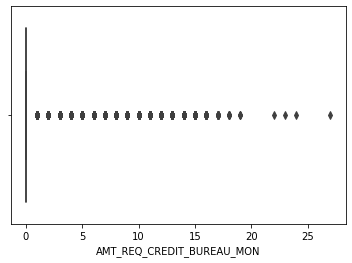

In [ ]:
sns.boxplot(app_df_1['AMT_REQ_CREDIT_BUREAU_MON'])

##### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_MON
app_df_1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

##### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_MON
app_df_1['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
app_df_1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
27.0     0.000376
22.0     0.000376
23.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [ ]:
# Checking statistics of the column 
app_df_1['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_MON, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 83% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0 

#### 3.3.2 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_WEEK

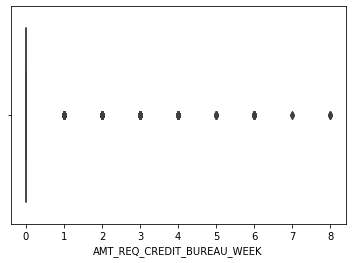

In [ ]:
sns.boxplot(app_df_1['AMT_REQ_CREDIT_BUREAU_WEEK'])

#### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_WEEK
app_df_1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK 
app_df_1['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
app_df_1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [ ]:
# Checking statistics of the column
app_df_1['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_WEEK, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 96% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0 

#### 3.3.3 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_DAY

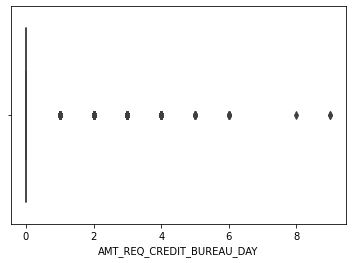

In [ ]:
sns.boxplot(app_df_1['AMT_REQ_CREDIT_BUREAU_DAY'])

##### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_DAY
app_df_1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

##### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_DAY
app_df_1['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
app_df_1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [ ]:
# Checking statistics of the column
app_df_1['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_DAY, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 99% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0 

### 3.3.4 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_HOUR

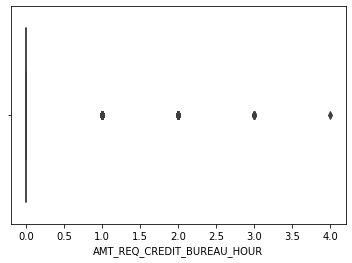

In [ ]:
#1. Finding if the column has Outliers or not
sns.boxplot(app_df_1['AMT_REQ_CREDIT_BUREAU_HOUR'])

#### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_HOUR
app_df_1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_HOUR 
app_df_1['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
app_df_1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
# Checking statistics of the column
app_df_1['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_HOUR, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 99% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0 

#### 3.3.5 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_QRT

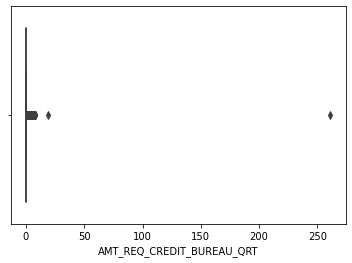

In [ ]:
sns.boxplot(app_df_1['AMT_REQ_CREDIT_BUREAU_QRT'])

#### The boxplot is not very clear and is severly impacted by outliers. We need to perform further analysis to understand the best imputation method

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_QRT
app_df_1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### Majority of the columns has 0 as value

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_QRT 
app_df_1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
app_df_1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
7.0       0.002632
8.0       0.002632
19.0      0.000376
261.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
# Checking statistics of the column
app_df_1['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

##### The statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot

#### For column AMT_REQ_CREDIT_BUREAU_QRT, we have two approaches either exclude missing values or impute the column with value 0 which is present in more than 80% of the rows. Hence, the recommended imputation technique is replacing null by the mode which is 0 

#### 3.3.6 Identifying imputation technique for AMT_REQ_CREDIT_BUREAU_YEAR

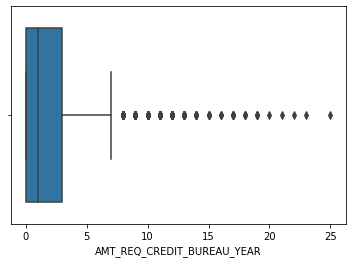

In [ ]:
sns.boxplot(app_df_1['AMT_REQ_CREDIT_BUREAU_YEAR'])

#### There are outliers in the data. We need to perform further analysis to understand the best imputation method

In [ ]:
#Understanding various records in the columns AMT_REQ_CREDIT_BUREAU_YEAR
app_df_1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [ ]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_YEAR 
app_df_1['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [ ]:
# Calculating percentage of each record in the dataframe
app_df_1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
21.0     0.000376
23.0     0.000376
25.0     0.000376
20.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
# Checking statistics of the column
app_df_1['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Values - 0,1,2,3 are present in a significant number. Hence, imputing null values(which is 13% of the total data set) can significantly change column statistics and hence, the best approach would be to remove these rows

### 3.4 Checking the data type of columns and fixing the incorrect data types

In [ ]:
#checking the data types to identify the incorrect data type
app_df_1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### We did not find any column with incorrect data types. Each categorical column is of type object and each numerical column is either of float or int type

In [ ]:
app_df['DAYS_BIRTH'][:1]

0   -9461
Name: DAYS_BIRTH, dtype: int64

In [ ]:
# Fixing the column with negative data and deriving the number of years for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE, & DAYS_ID_PUBLISH
app_df_1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' ]].div(365).round(2).abs()
app_df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,25.55,0.65,23.17,5.43,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY

### 3.5 Identifying Outliers for Numerical columns

In [ ]:
# verifying the clean data
app_df_1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### For the outlier analysis of numerical columns, we will focus on
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- FLOORSMAX_AVG

#### 3.5.1 Outlier analysis for AMT_GOODS_PRICE

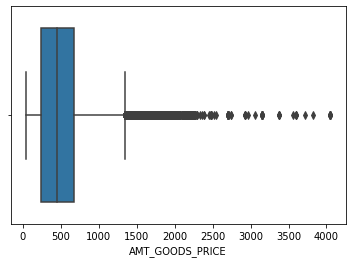

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app_df_1['AMT_GOODS_PRICE']/1000.0)

In [ ]:
# checking column statistics
(app_df_1['AMT_GOODS_PRICE']/1000).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
# Maximum value for boxplot
IQR_AMT_GOODS_PRICE = (app_df_1['AMT_GOODS_PRICE']/1000).quantile(0.75) - (app_df_1['AMT_GOODS_PRICE']/1000).quantile(0.25)
Upper_limit_IQR_AMT_GOODS_PRICE = (app_df_1['AMT_GOODS_PRICE']/1000).quantile(0.75) + IQR_AMT_GOODS_PRICE*1.5
Upper_limit_IQR_AMT_GOODS_PRICE

1341.0

In [ ]:
# percentage of outliers in AMT_GOODS_PRICE
round(100.0 * len(app_df_1[(app_df_1['AMT_GOODS_PRICE']/1000)>Upper_limit_IQR_AMT_GOODS_PRICE])/len(app_df_1), 2)

4.79

#### From the boxplot, we can see there are outliers in AMT_GOODS_PRICE. The percentage of outliers stands at 4.79%

#### 3.5.2 Outlier analysis for AMT_INCOME_TOTAL

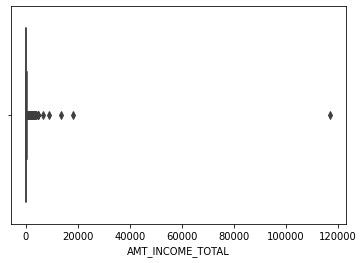

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app_df_1['AMT_INCOME_TOTAL']/1000)

In [ ]:
# checking column statistics
(app_df_1['AMT_INCOME_TOTAL']/1000).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
# Maximum value for boxplot
IQR_AMT_INCOME_TOTAL = (app_df_1['AMT_INCOME_TOTAL']/1000).quantile(0.75) - (app_df_1['AMT_INCOME_TOTAL']/1000).quantile(0.25)
Upper_limit_AMT_INCOME_TOTAL = (app_df_1['AMT_INCOME_TOTAL']/1000).quantile(0.75) + IQR_AMT_INCOME_TOTAL*1.5
Upper_limit_AMT_INCOME_TOTAL

337.5

In [ ]:
# percentage of outliers in AMT_INCOME_TOTAL
round(100.0 * len(app_df_1[(app_df_1['AMT_INCOME_TOTAL']/1000)>Upper_limit_AMT_INCOME_TOTAL])/len(app_df_1), 2)

4.56

#### From the boxplot, we can see there are outliers in AMT_INCOME_TOTAL. The percentage of outliers stands at 4.56%


#### 3.5.3 Outlier analysis for AMT_CREDIT

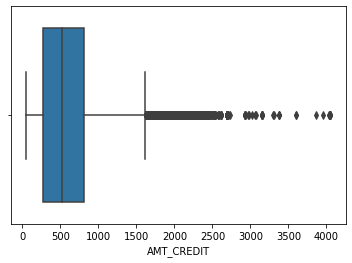

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app_df_1['AMT_CREDIT']/1000.0)

In [ ]:
# checking column statistics
(app_df_1['AMT_CREDIT']/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [ ]:
# Maximum value for boxplot
IQR_AMT_CREDIT = (app_df_1['AMT_CREDIT']/1000).quantile(0.75) - (app_df_1['AMT_CREDIT']/1000).quantile(0.25)
Upper_limit_AMT_CREDIT = (app_df_1['AMT_CREDIT']/1000).quantile(0.75) + IQR_AMT_CREDIT*1.5
Upper_limit_AMT_CREDIT

1616.625

In [ ]:
# percentage of outliers in AMT_CREDIT
round(100.0 * len(app_df_1[(app_df_1['AMT_CREDIT']/1000)>Upper_limit_AMT_CREDIT])/len(app_df_1), 2)

2.13

#### From the boxplot, we can see there are outliers in AMT_CREDIT. The percentage of outliers stands at 2.13%


#### 3.5.4 Outlier analysis for AMT_ANNUITY

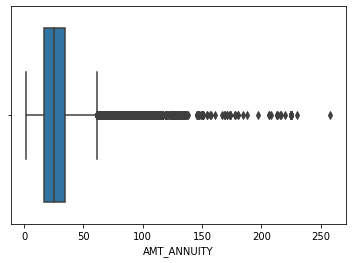

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app_df_1['AMT_ANNUITY']/1000.0)

In [ ]:
# checking column statistics
(app_df_1['AMT_ANNUITY']/1000).describe()

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

In [ ]:
# Maximum value for boxplot
IQR_AMT_ANNUITY = (app_df_1['AMT_ANNUITY']/1000).quantile(0.75) - (app_df_1['AMT_ANNUITY']/1000).quantile(0.25)
Upper_limit_AMT_ANNUITY = (app_df_1['AMT_ANNUITY']/1000).quantile(0.75) + IQR_AMT_ANNUITY*1.5
Upper_limit_AMT_ANNUITY

61.70399999999999

In [ ]:
# percentage of outliers in AMT_ANNUITY
round(100.0 * len(app_df_1[(app_df_1['AMT_ANNUITY']/1000)>Upper_limit_AMT_ANNUITY])/len(app_df_1), 2)

2.44

#### From the boxplot, we can see there are outliers in AMT_ANNUITY. The percentage of outliers stands at 2.44%


#### 3.5.5 Outlier analysis for FLOORSMAX_AVG

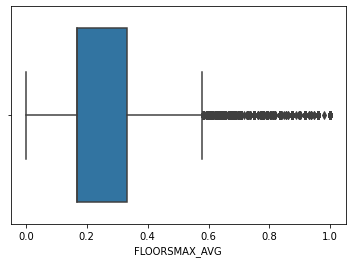

In [ ]:
sns.boxplot(app_df_1['FLOORSMAX_AVG'])

In [ ]:
(app_df_1['FLOORSMAX_AVG']).describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [ ]:
# Maximum value for boxplot
IQR_FLOORSMAX_AVG = (app_df_1['FLOORSMAX_AVG']).quantile(0.75) - (app_df_1['FLOORSMAX_AVG']).quantile(0.25)
Upper_limit_FLOORSMAX_AVG = (app_df_1['FLOORSMAX_AVG']).quantile(0.75) + IQR_FLOORSMAX_AVG*1.5
Upper_limit_FLOORSMAX_AVG

0.5831999999999999

In [ ]:
# percentage of outliers in FLOORSMAX_AVG
round(100.0 * len(app_df_1[(app_df_1['FLOORSMAX_AVG'])>Upper_limit_FLOORSMAX_AVG])/len(app_df_1), 2)

1.7

#### From the boxplot, we can see there are outliers in FLOORSMAX_AVG. The percentage of outliers stands at 1.7%


### 3.6 Binning of continuous Variable

#### For the binning, we will use following columns
- AGE_GROUP
- AMT_CATEGORY

In [ ]:
# 1. DAYS_BIRTH column can be binned 0-10,10-20,20-30,30-40, 40-50 and so on
app_df_1['AGE_GROUP'] = pd.cut(x=app_df_1.DAYS_BIRTH, bins=[0,19,29, 39, 49, 59,69,79,89], labels=['10s','20s', '30s', '40s' ,'50s', '60s','70s', '80s'])
app_df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20s
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40s
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50s
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s


In [ ]:
# 2. AMT_INCOME_TOTAL column can be binned 'Low','Average', 'Good', 'Best' ,'High', 'Very High'
app_df_1['AMT_CATEGORY'] = pd.cut(x=app_df_1.AMT_INCOME_TOTAL, bins=[0,100000, 200000, 300000, 400000, 500000, 600000], labels=['Low','Average', 'Good', 'Best' ,'High', 'Very High'])
app_df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average


## 4. Analysis

In [ ]:
app_df_1.shape

(307511, 83)

### For further analysis, we will remove irrelevant columns and continue analysis with a few selected columns

In [ ]:
# list of columns to be dropped
drop_columns = ['FLAG_CONT_MOBILE',
                'FLAG_MOBIL',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'FLAG_PHONE',
                'FLAG_EMAIL',
                'HOUR_APPR_PROCESS_START',
                'WEEKDAY_APPR_PROCESS_START',
                'FLOORSMAX_AVG',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'FLOORSMAX_AVG',
                'FLOORSMAX_MODE',
                'FLOORSMAX_MEDI',
                'TOTALAREA_MODE',
                'EMERGENCYSTATE_MODE',
                'REGION_POPULATION_RELATIVE',
                'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BEGINEXPLUATATION_MEDI',
                'YEARS_BEGINEXPLUATATION_MODE',
                'REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION',
                'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY',
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_20',
                'FLAG_DOCUMENT_21'
               ]

In [ ]:
app_df_2 = app_df_1.drop(columns=drop_columns, axis=1)
app_df_2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,9.99,5.81,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,3.11,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.93,3.25,3.25,0.80,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,2.27,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,11.67,6.93,Laborers,1.0,2,2,Government,0.0,0.0,0.0,0.0,2.23,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,26.94,6.68,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1.69,NaN,NaN,NaN,NaN,NaN,NaN,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,11.81,9.47,Core staff,1.0,2,2,Religion,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.55,0.65,23.17,5.43,Sales staff,1.0,1,1,Services,0.0,0.0,0.0,0.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,20s,Average
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.92,1000.67,12.02,11.21,NaN,1.0,2,2,XNA,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,50s,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.00,21.70,18.46,14.11,Managers,1.0,3,3,School,6.0,0.0,6.0,0.0,5.23,1.0,0.0,0.0,1.0,0.0,1.0,40s,Average
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,32.77,13.11,7.02,2.55,Laborers,2.0,2,2,Business Entity Type 1,0.0,0.0,0.0,0.0,0.88,0.0,0.0,0.0,0.0,0.0,0.0,30s,Average


In [ ]:
app_df_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,9.99,5.81,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,3.11,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.93,3.25,3.25,0.80,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,2.27,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,11.67,6.93,Laborers,1.0,2,2,Government,0.0,0.0,0.0,0.0,2.23,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,26.94,6.68,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1.69,NaN,NaN,NaN,NaN,NaN,NaN,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,11.81,9.47,Core staff,1.0,2,2,Religion,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average


In [ ]:
# looking at the columns with missing value in remaining dataframe
round(100.0 * app_df_2.isnull().sum()/len(app_df_2), 2).sort_values(ascending= False)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_CATEGORY                    0.52
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
TARGET                          0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
DAYS_REGISTRATION               0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
N

In [ ]:
app_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### 4.1 Checking imbalance in data

In [ ]:
app_df['TARGET'][1:100:5]

1     0
6     0
11    0
16    0
21    0
26    1
31    0
36    0
41    0
46    0
51    0
56    0
61    0
66    0
71    0
76    0
81    1
86    0
91    0
96    0
Name: TARGET, dtype: int64

In [ ]:
# Finding % of people with outstanding dues and no outstanding dues.

target_0_percentage = (round (len(app_df_2.query('TARGET=="0"'))/len(app_df_2),4)) * 100
print ("Target_0_percentage:", target_0_percentage,"%")

target_1_percentage = (round (len(app_df_2.query('TARGET=="1"'))/len(app_df_2),4)) * 100
print ("Target_1_percentage:", target_1_percentage,"%")

Target_0_percentage: 91.93 %
Target_1_percentage: 8.07 %


#### As the percentage of Target =0 and Target =1 are different, there is an imbalance

### 4.2 Creation of two data sets - one for each Target = 1 and Target = 0

#### 4.2.1 Creating Target_0_df, people having no outstanding dues

In [ ]:
# Creating Dataframe of the non-defaulters  
target_0_df = app_df_2.query('TARGET=="0"')
target_0_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.93,3.25,3.25,0.80,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,2.27,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,11.67,6.93,Laborers,1.0,2,2,Government,0.0,0.0,0.0,0.0,2.23,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,26.94,6.68,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1.69,NaN,NaN,NaN,NaN,NaN,NaN,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,11.81,9.47,Core staff,1.0,2,2,Religion,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,46.41,4.35,13.62,1.31,Laborers,2.0,2,2,Other,0.0,0.0,0.0,0.0,6.95,0.0,0.0,0.0,0.0,1.0,1.0,40s,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,66.81,1000.67,20.19,6.46,NaN,1.0,2,2,XNA,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,0.0,0.0,60s,Average
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,25.55,0.65,23.17,5.43,Sales staff,1.0,1,1,Services,0.0,0.0,0.0,0.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,20s,Average
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,56.92,1000.67,12.02,11.21,NaN,1.0,2,2,XNA,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,50s,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,41.00,21.70,18.46,14.11,Managers,1.0,3,3,School,6.0,0.0,6.0,0.0,5.23,1.0,0.0,0.0,1.0,0.0,1.0,40s,Average


In [ ]:
target_0_df.shape

(282686, 38)

#### 4.2.2 Creating Target_1_df, people having outstanding dues

In [ ]:
# Creating Dataframe of the defaulters
target_1_df = app_df_2.query('TARGET=="1"')
target_1_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,9.99,5.81,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,3.11,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.30,7.20,18.01,5.01,Cooking staff,1.0,3,2,Business Entity Type 3,10.0,1.0,10.0,0.0,0.44,0.0,0.0,0.0,0.0,2.0,2.0,50s,Average
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.90,3.46,3.24,2.82,Laborers,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,2.95,0.0,0.0,0.0,2.0,0.0,4.0,40s,Good
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,36.67,9.85,0.12,12.08,Sales staff,2.0,3,3,Self-employed,1.0,0.0,1.0,0.0,4.05,0.0,0.0,0.0,0.0,0.0,2.0,30s,Average
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,67.93,1000.67,14.77,11.50,NaN,2.0,2,2,XNA,1.0,1.0,1.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,60s,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,27.17,8.35,23.31,7.07,Laborers,3.0,3,3,Business Entity Type 3,0.0,0.0,0.0,0.0,0.89,0.0,0.0,0.0,0.0,0.0,2.0,20s,Good
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,36.76,6.59,1.37,12.89,Laborers,3.0,2,2,Construction,0.0,0.0,0.0,0.0,4.09,0.0,0.0,0.0,1.0,0.0,6.0,30s,Average
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,56.56,8.62,24.44,10.50,Managers,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,8.06,0.0,0.0,0.0,0.0,0.0,3.0,50s,Good
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,45.13,0.78,22.72,0.02,Sales staff,2.0,2,2,Business Entity Type 3,1.0,1.0,1.0,0.0,0.84,0.0,0.0,0.0,0.0,1.0,2.0,40s,Good


In [ ]:
target_1_df.shape

(24825, 38)

In [ ]:
# Checking count unique values in each columns
app_df_2.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AMT_CATEGORY                        6
AGE_GROUP                           6
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_S

In [ ]:
# Cheking column types
app_df_2.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
ORGANIZATION_TYPE                object


#### Any column which is either of object type or have less than 40 values is considered categorical. Remaining columns of type float or int will be considered numerical

In [ ]:
#list of all categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP',
                       'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE',
                       'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE',
                       'OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE',                       
                       'REGION_RATING_CLIENT_W_CITY',
                       'REGION_RATING_CLIENT',
                       'AMT_REQ_CREDIT_BUREAU_HOUR',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_DAY',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_QRT',
                       'CNT_CHILDREN',
                       'CNT_FAM_MEMBERS',
                       'AMT_REQ_CREDIT_BUREAU_MON',
                       'AMT_REQ_CREDIT_BUREAU_YEAR',
                       'OBS_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                      ]

In [ ]:
# list of all continuous numerical column
numerical_columns= ['AMT_GOODS_PRICE',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED',
                    'DAYS_REGISTRATION',
                    'DAYS_BIRTH',
                    'AMT_CREDIT',
                    'AMT_ANNUITY'
                   ]

### 4.3 Univariate Analysis for categorical variable

##### Under univariate analysis, we will look at percentage distribution of values of categorial variable

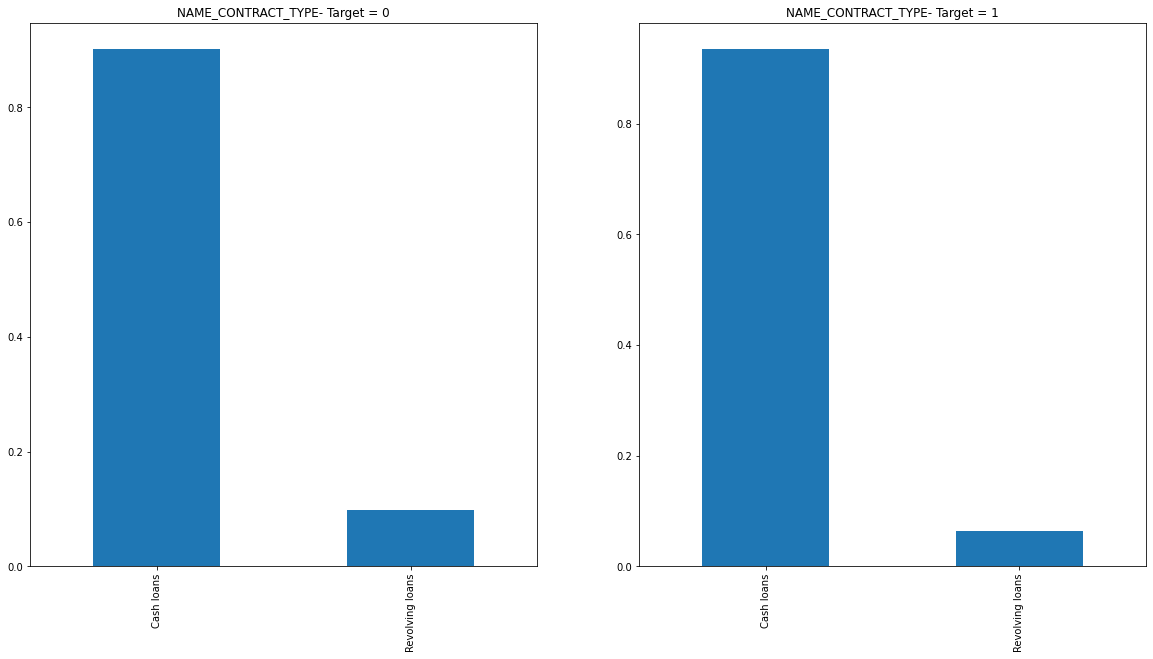

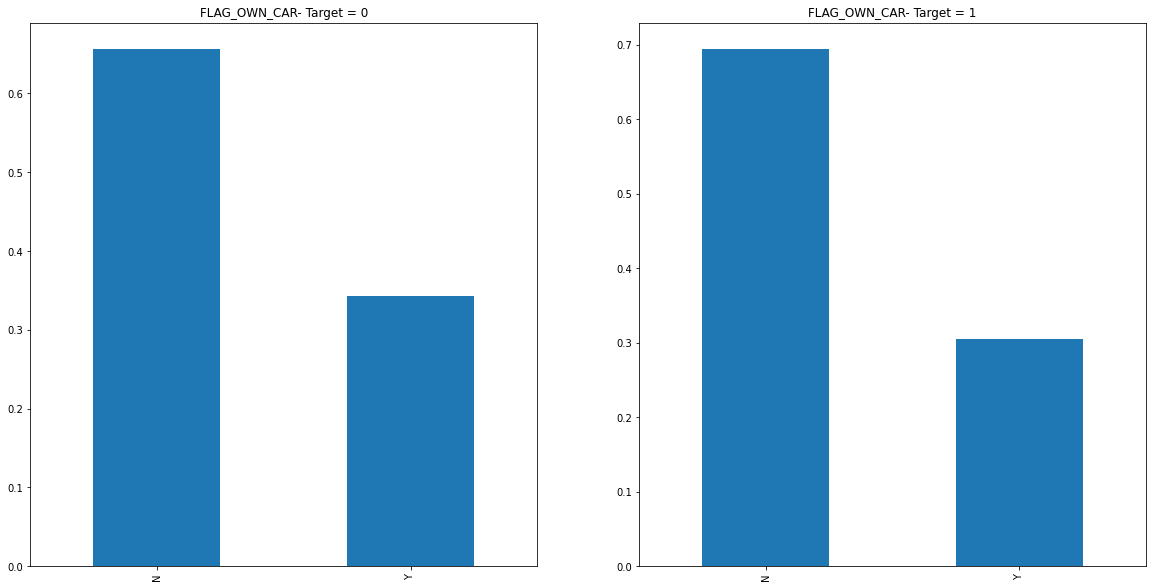

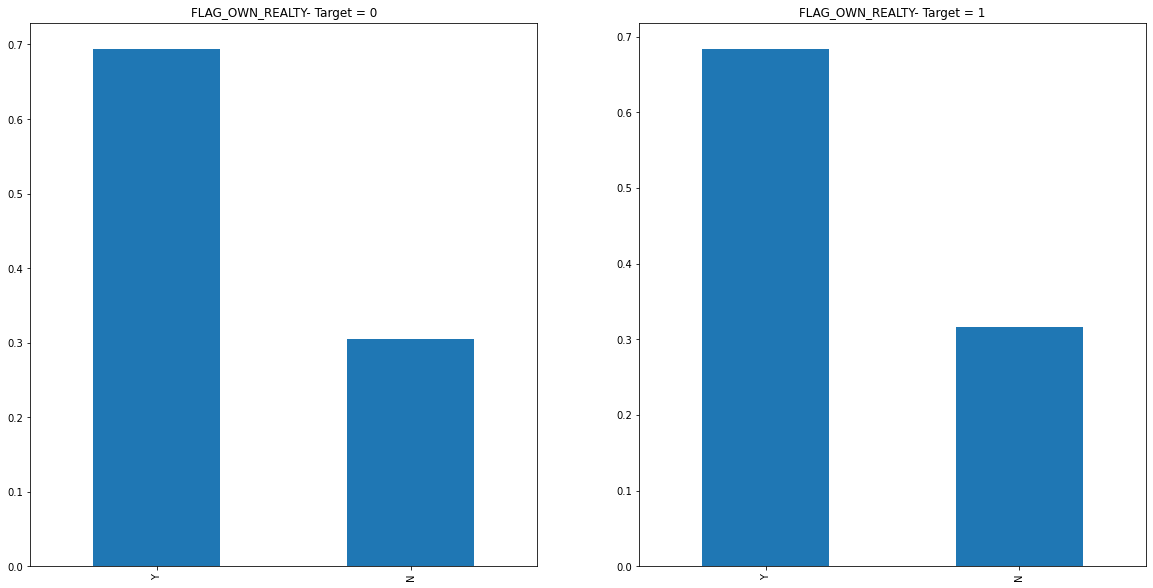

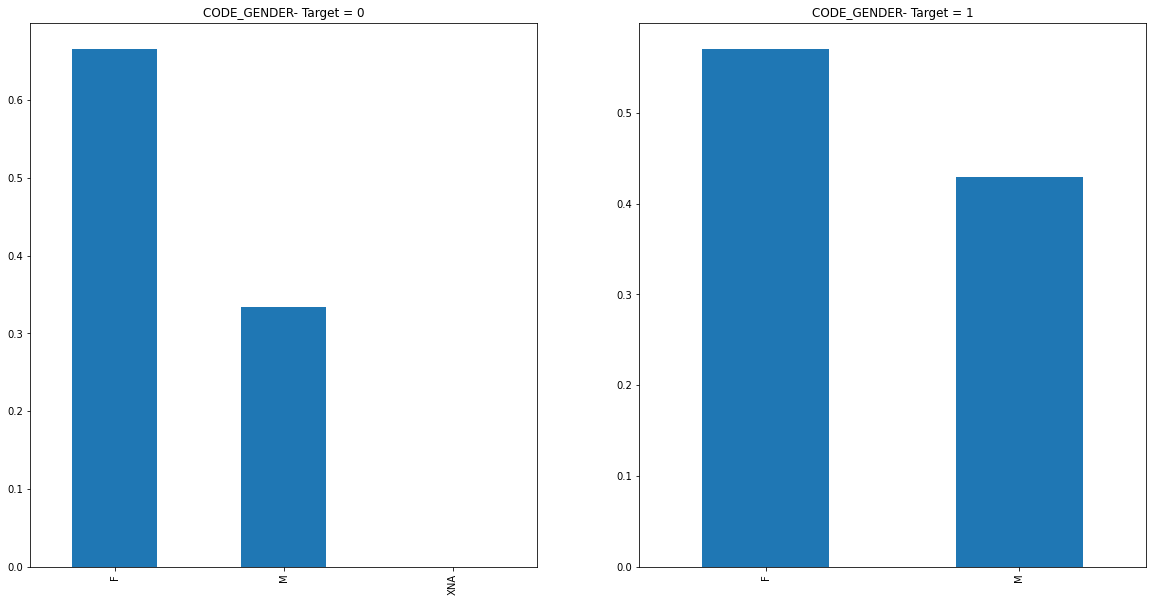

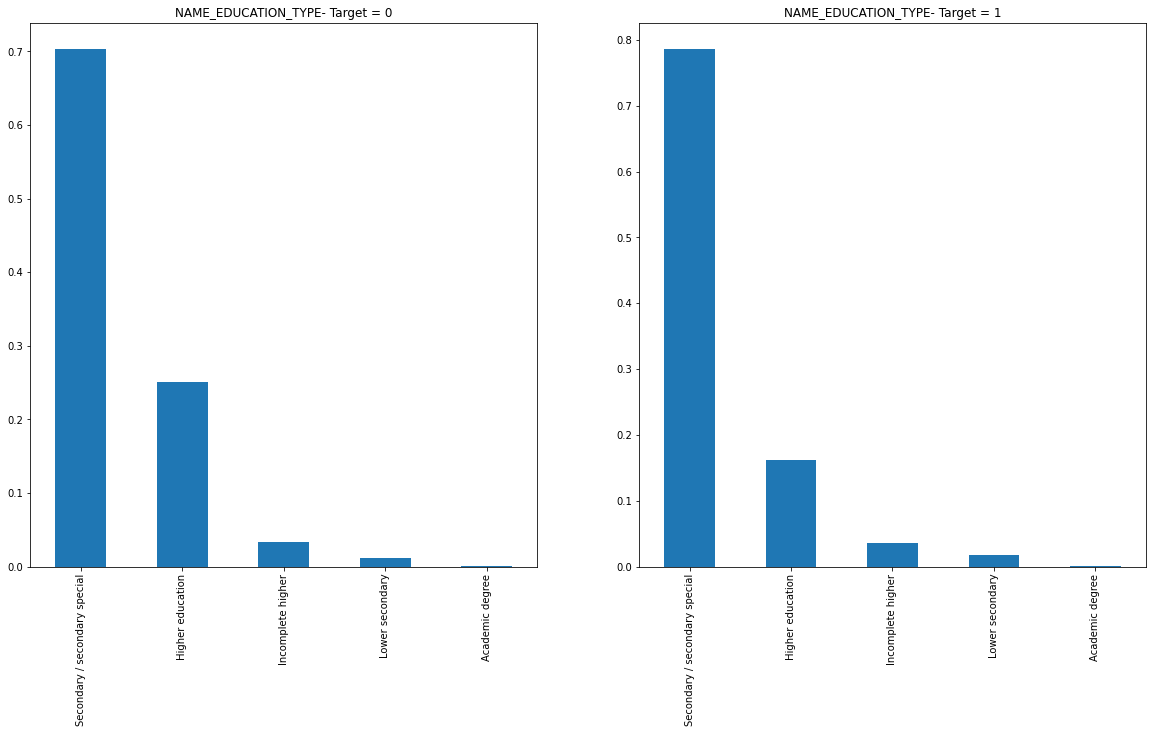

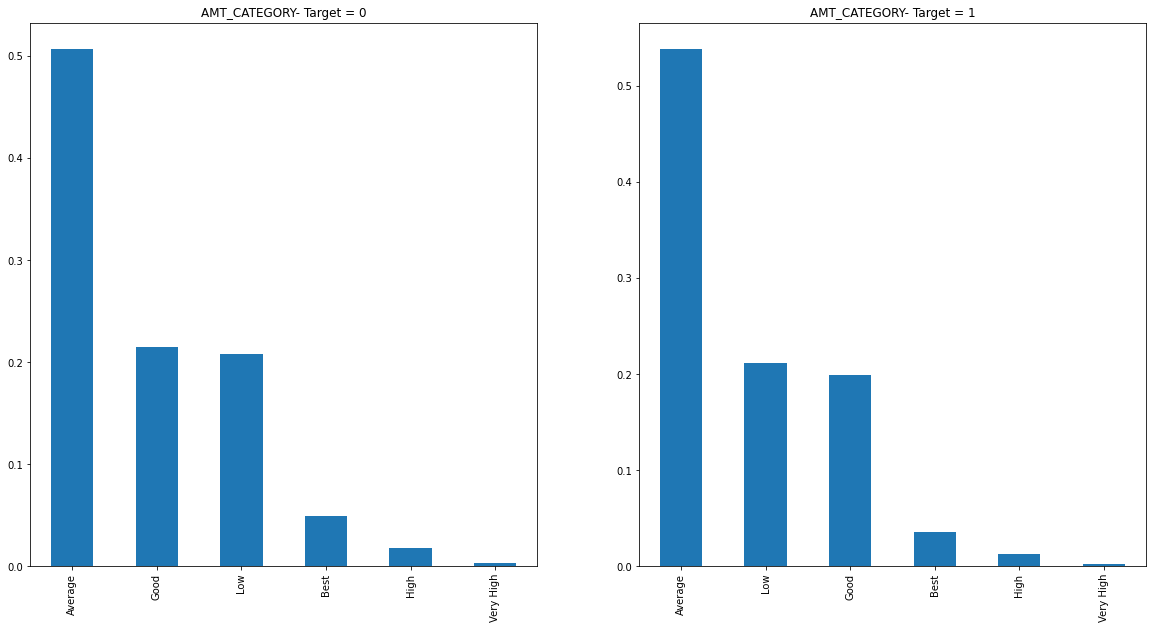

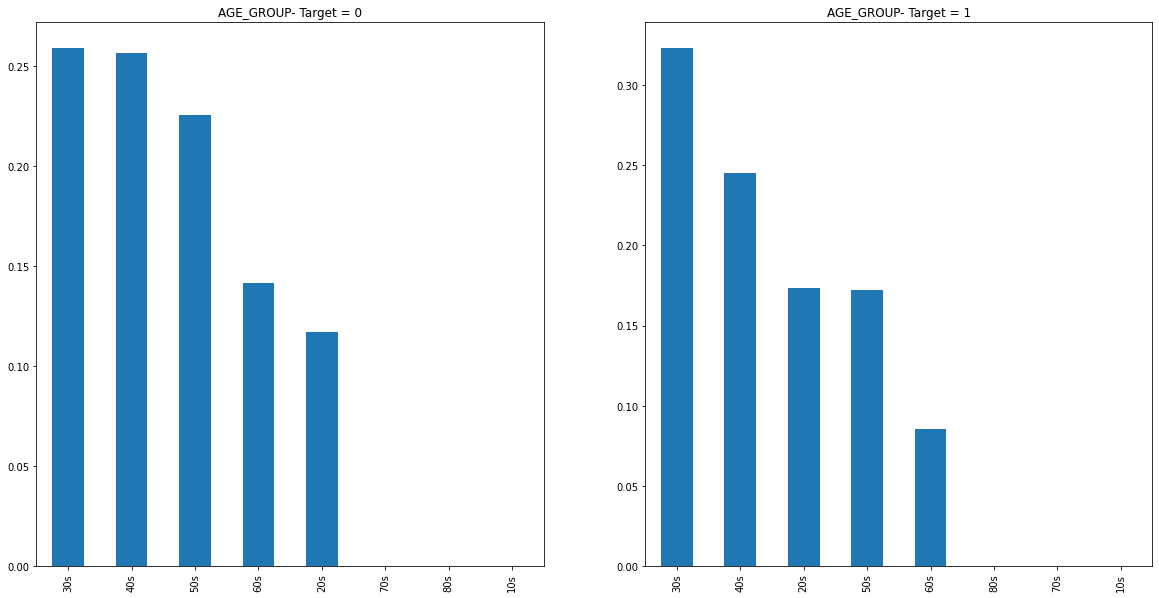

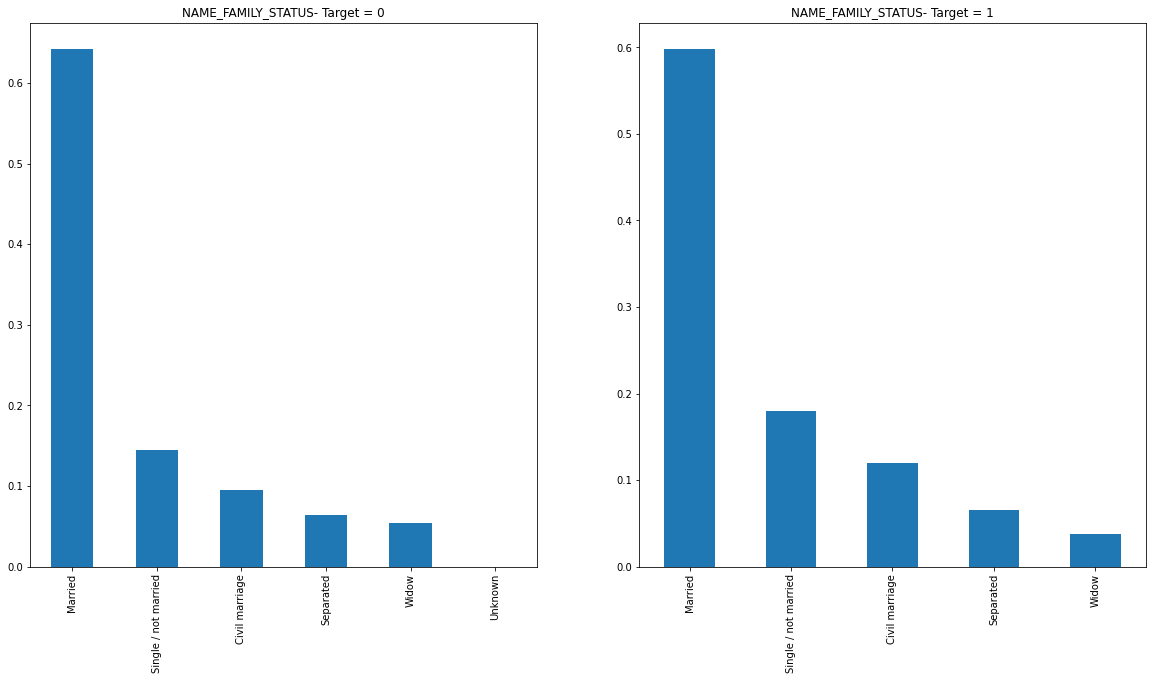

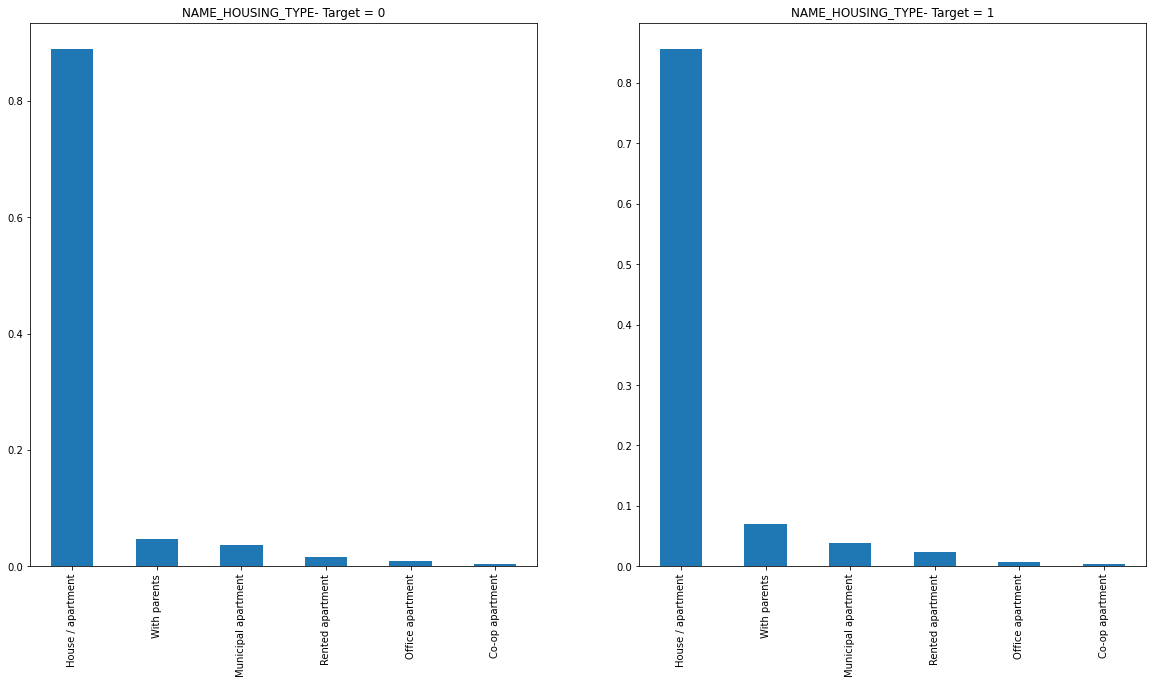

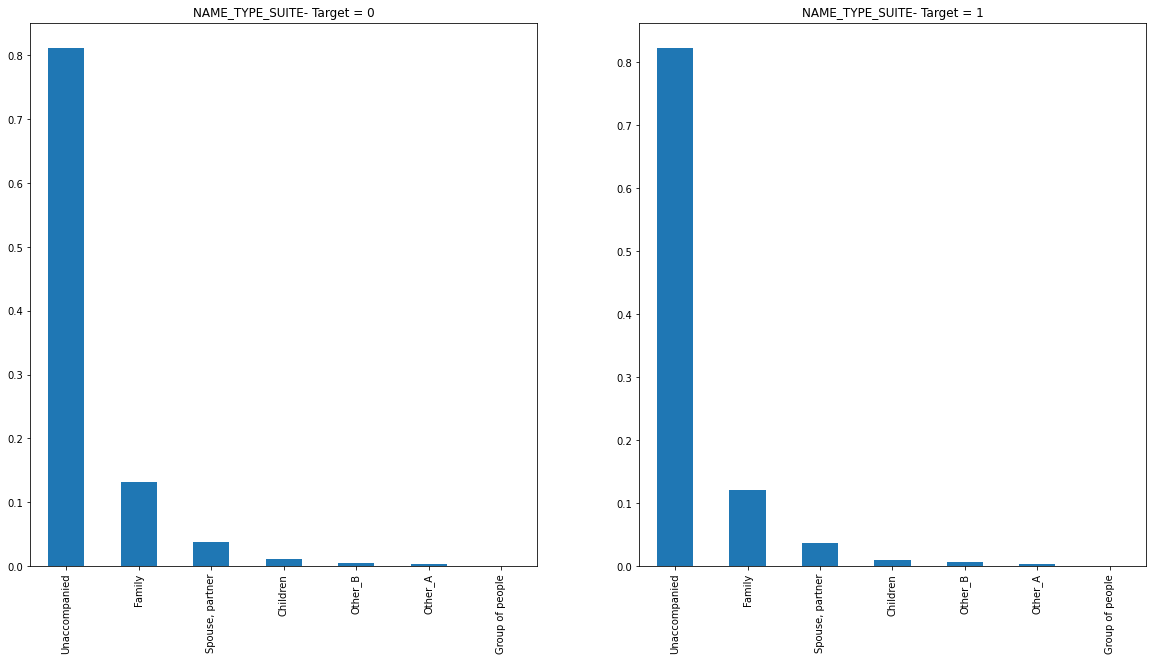

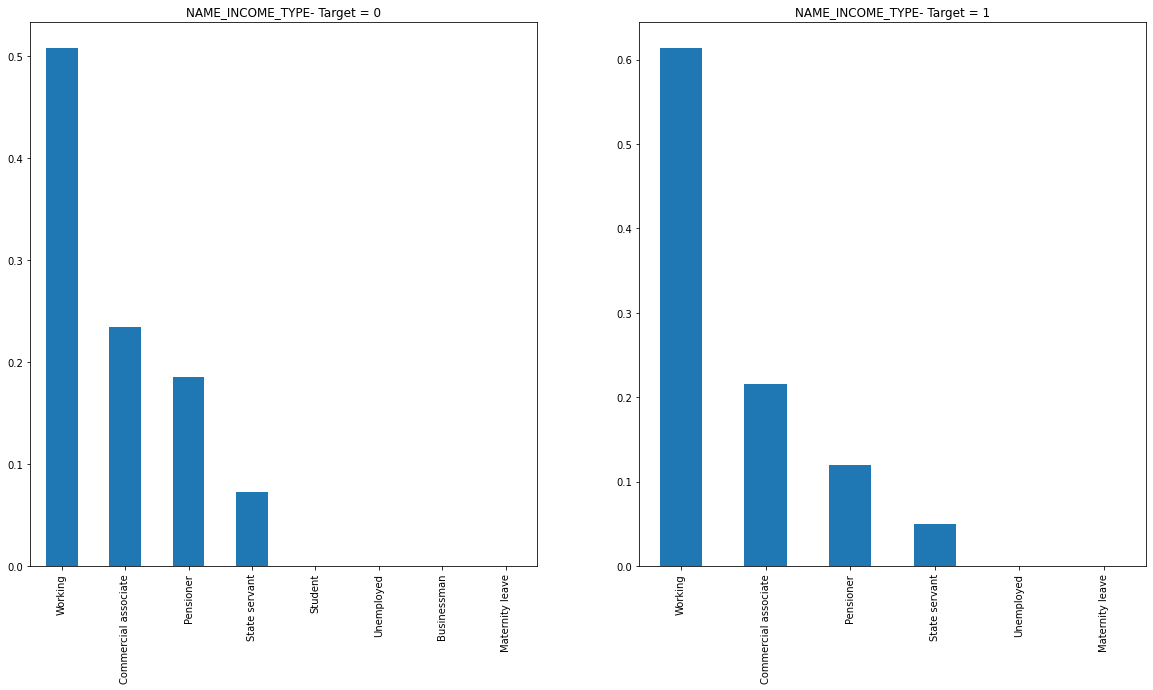

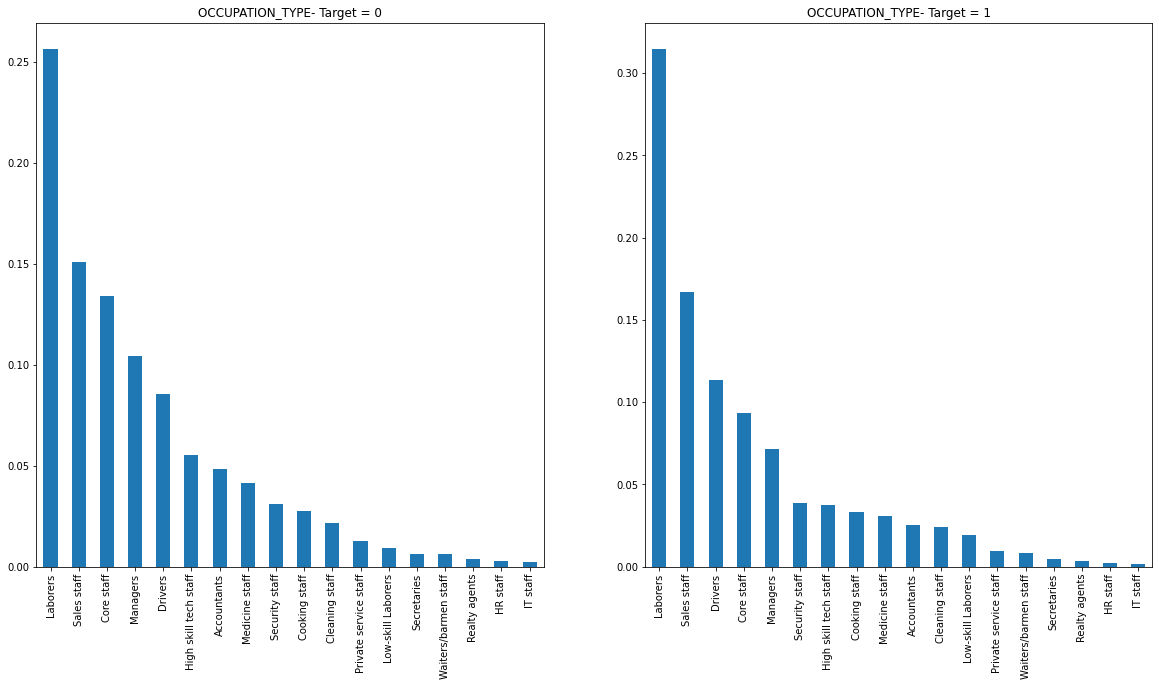

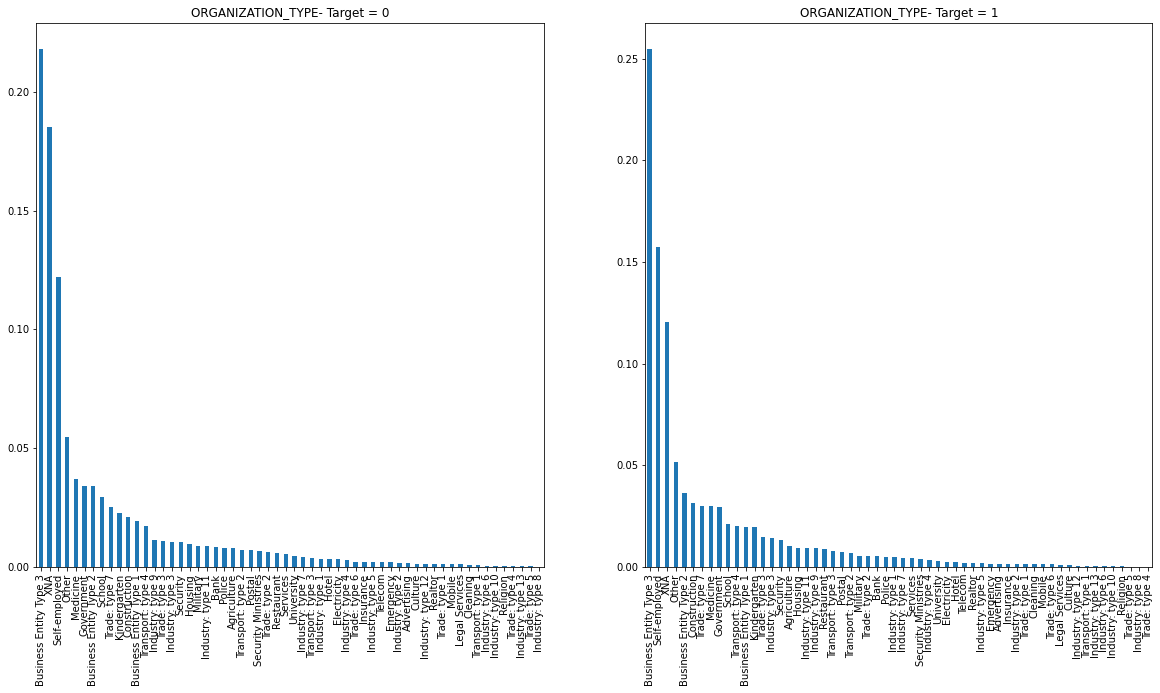

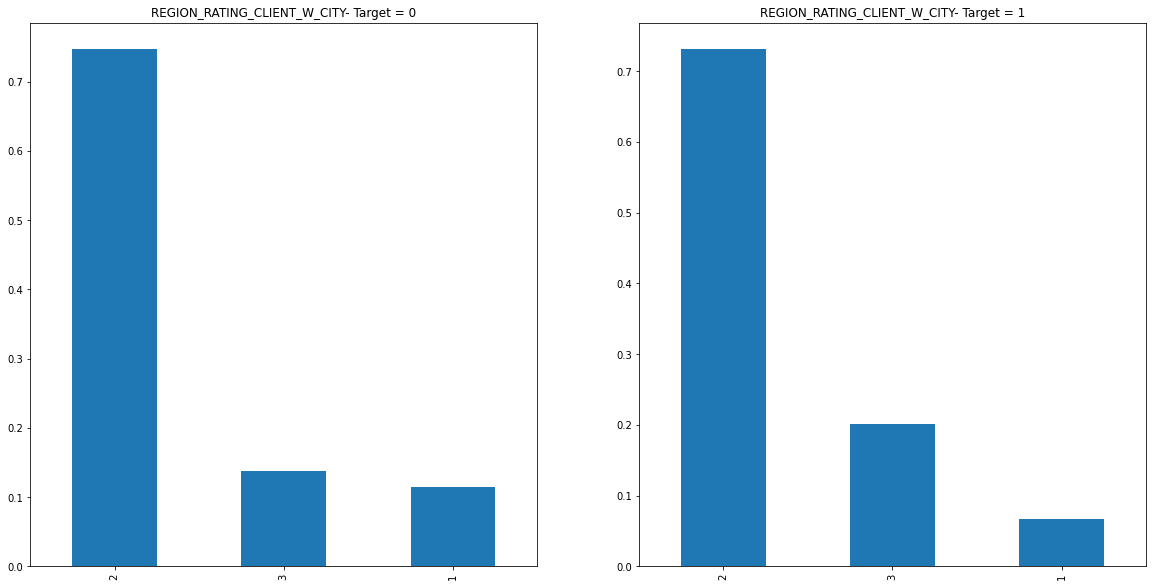

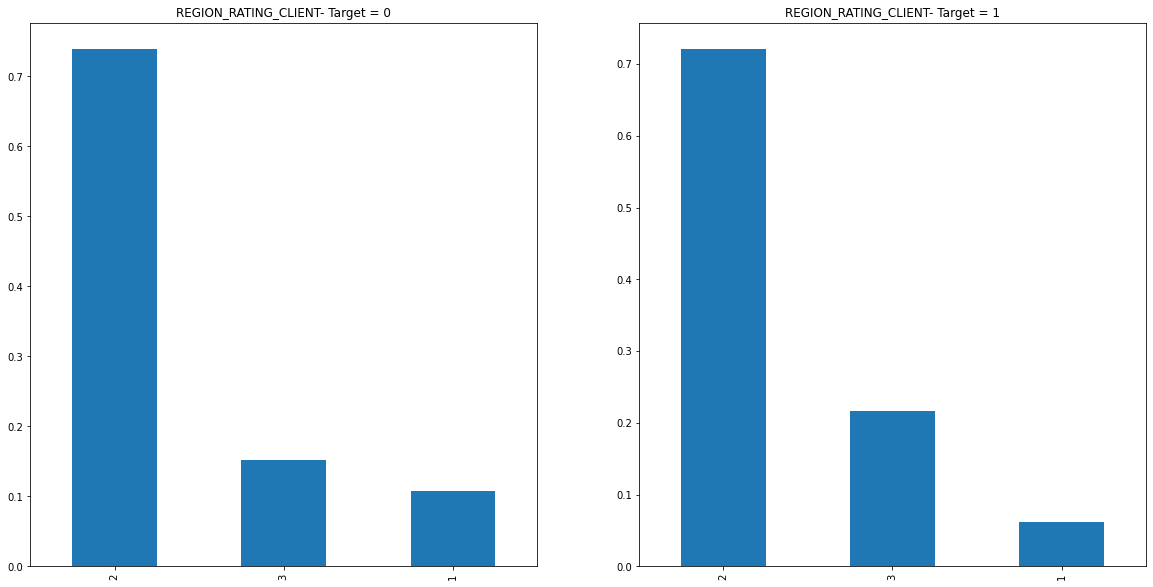

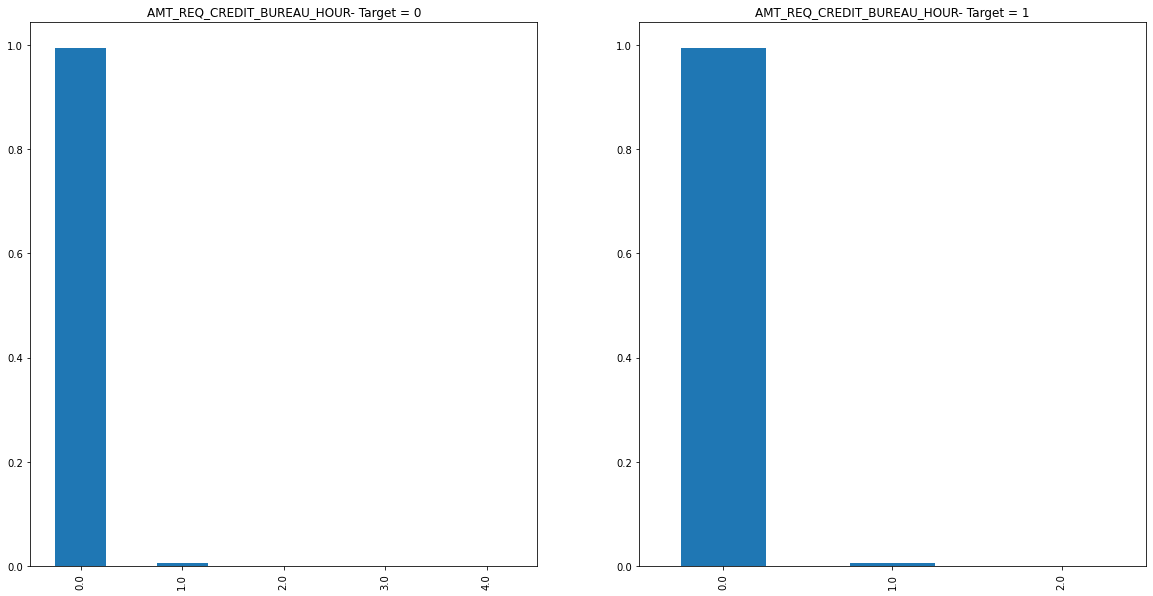

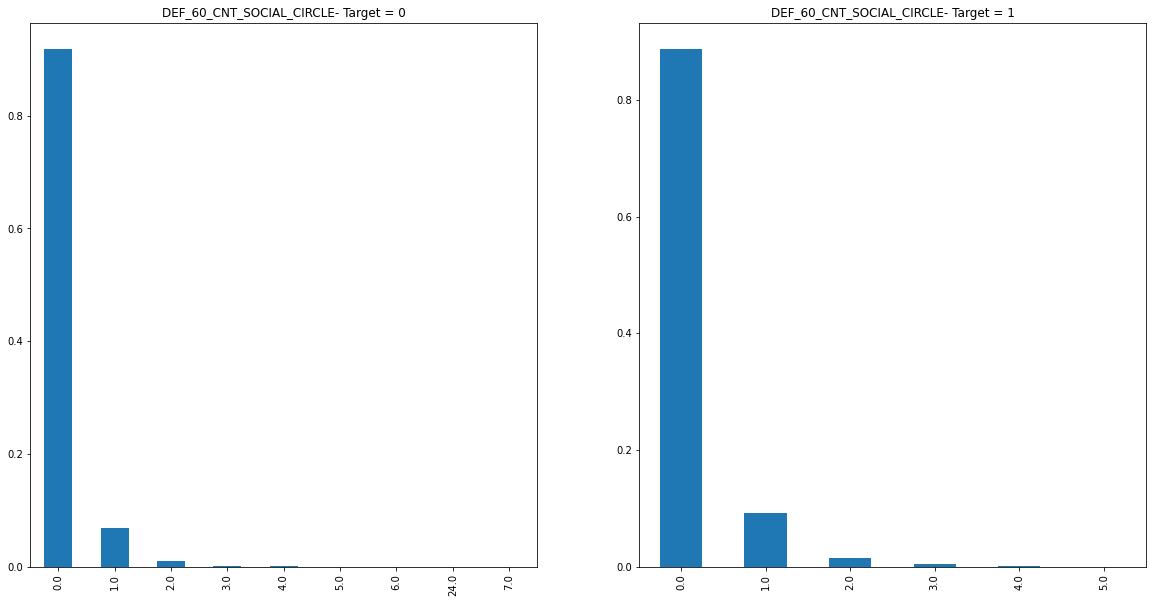

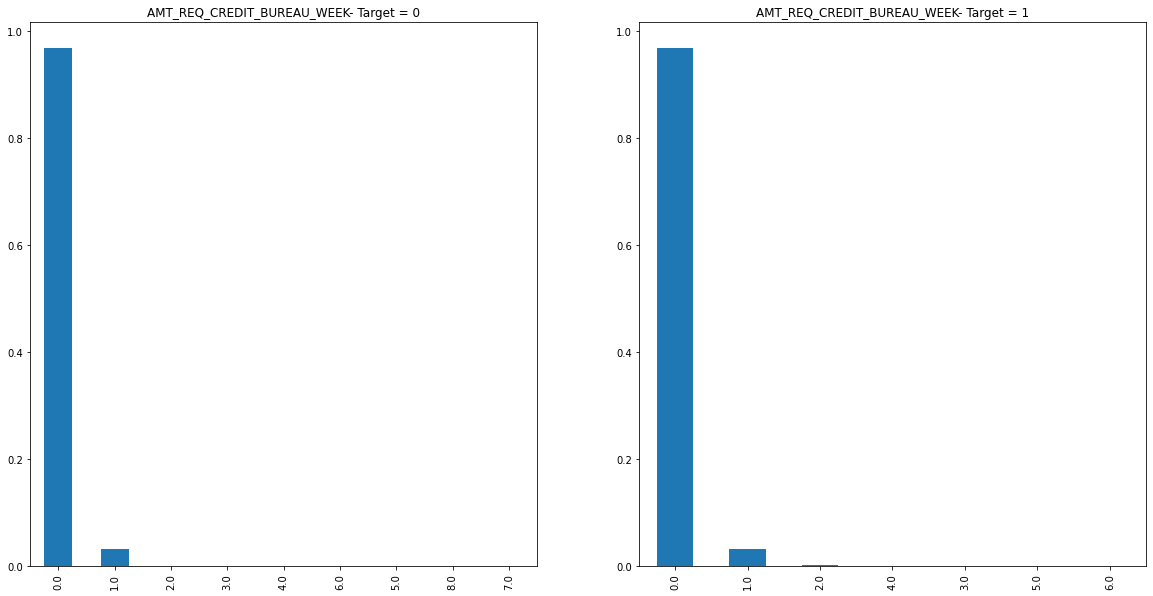

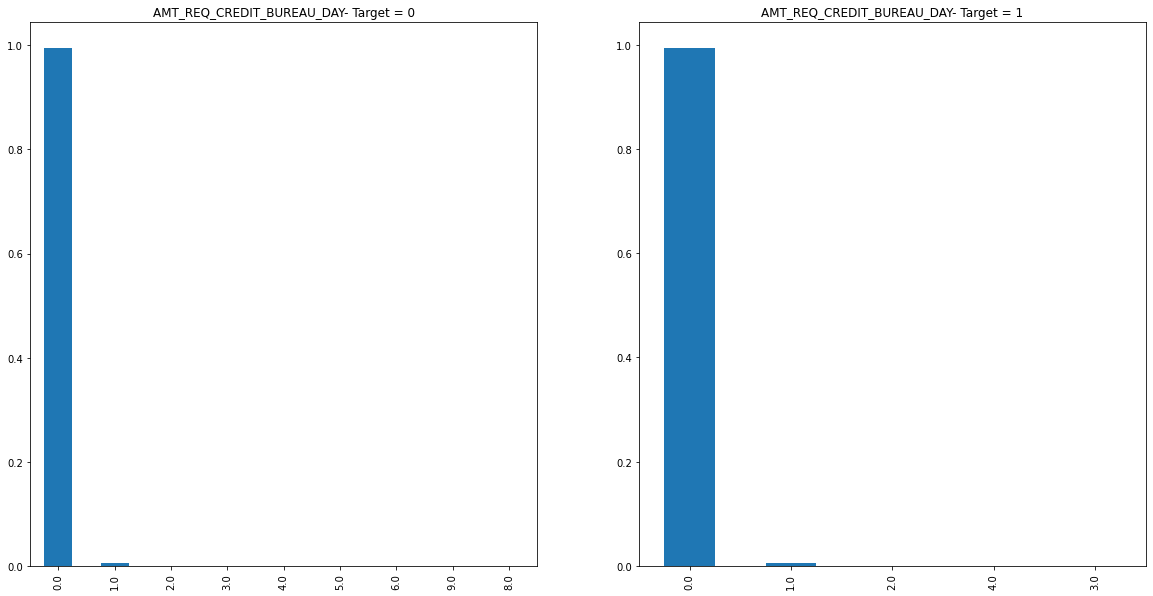

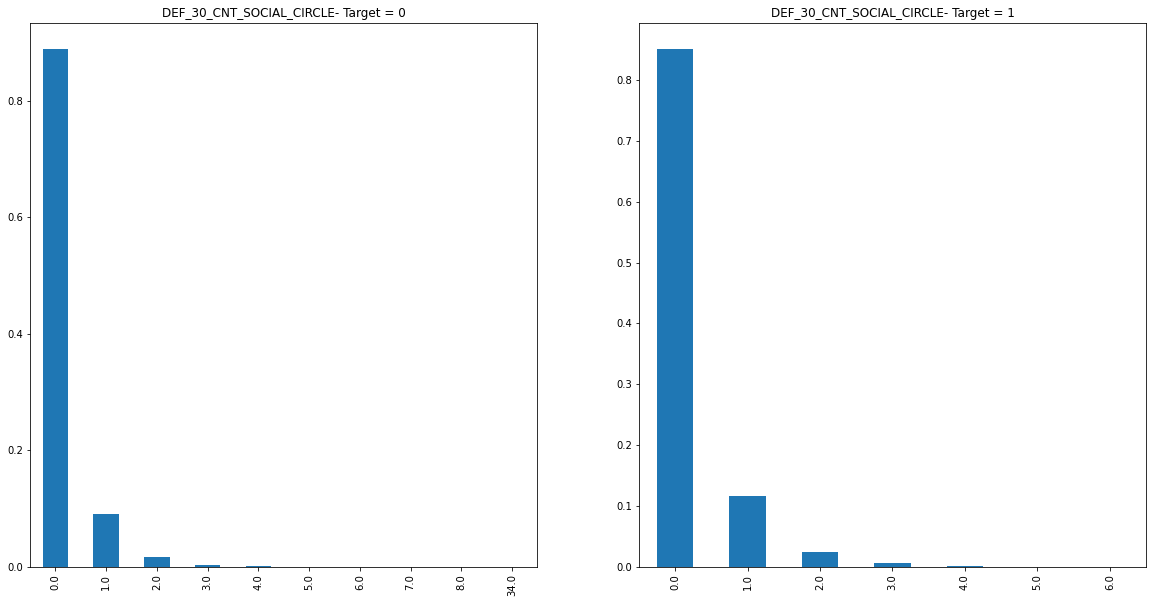

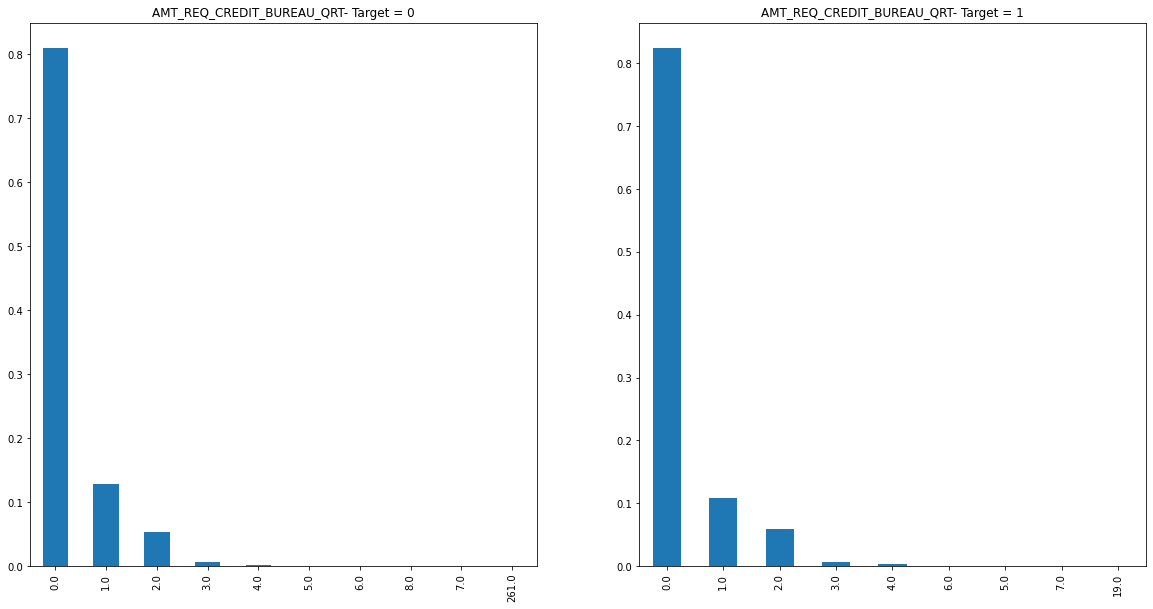

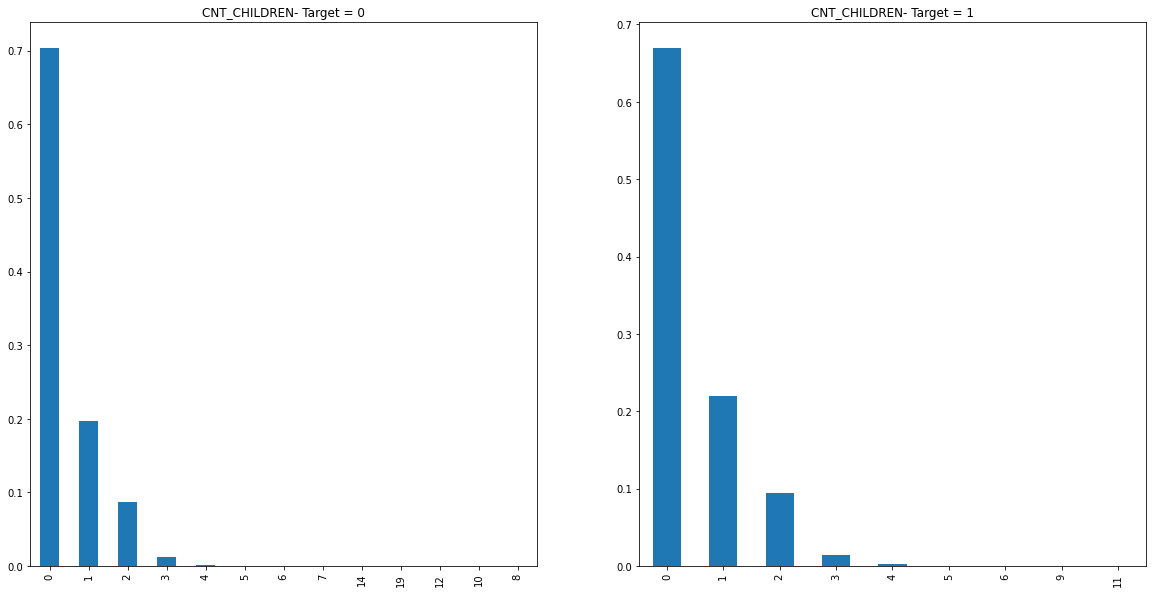

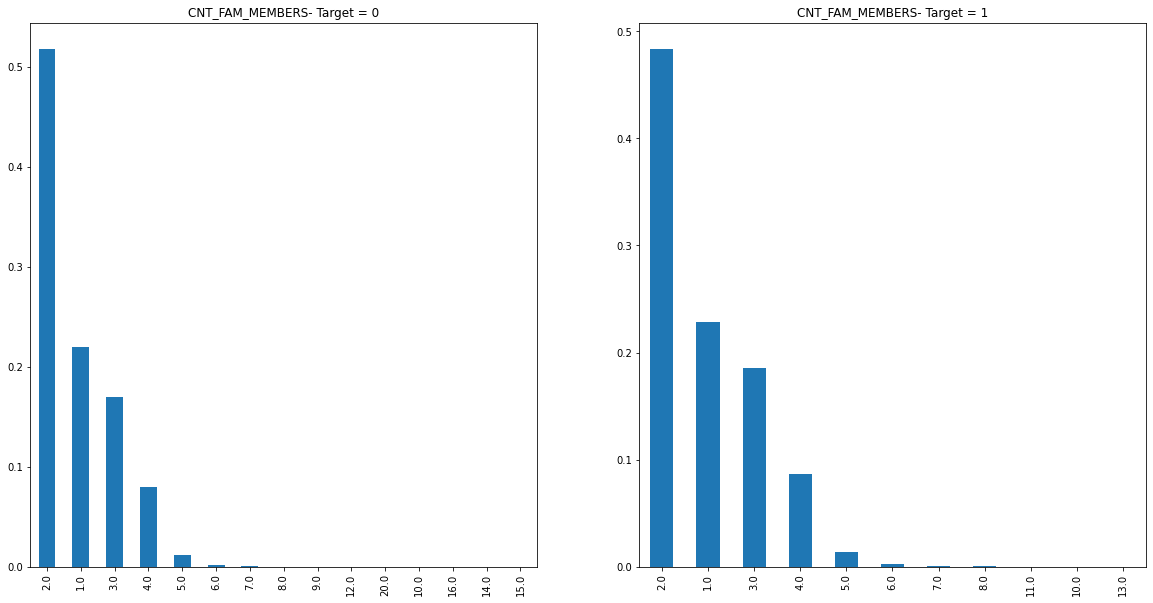

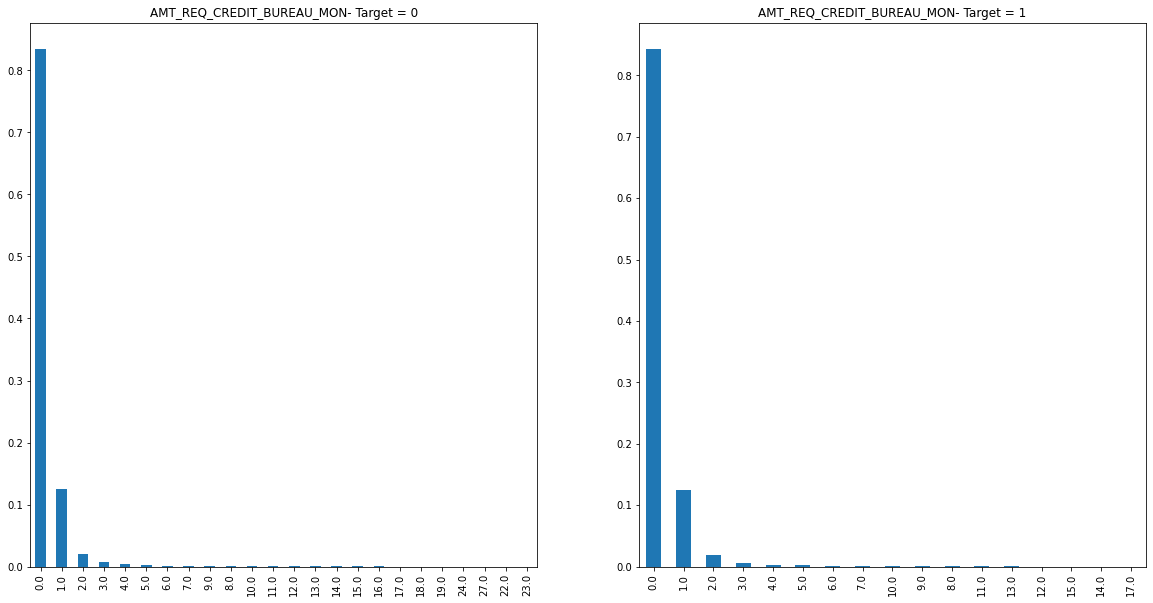

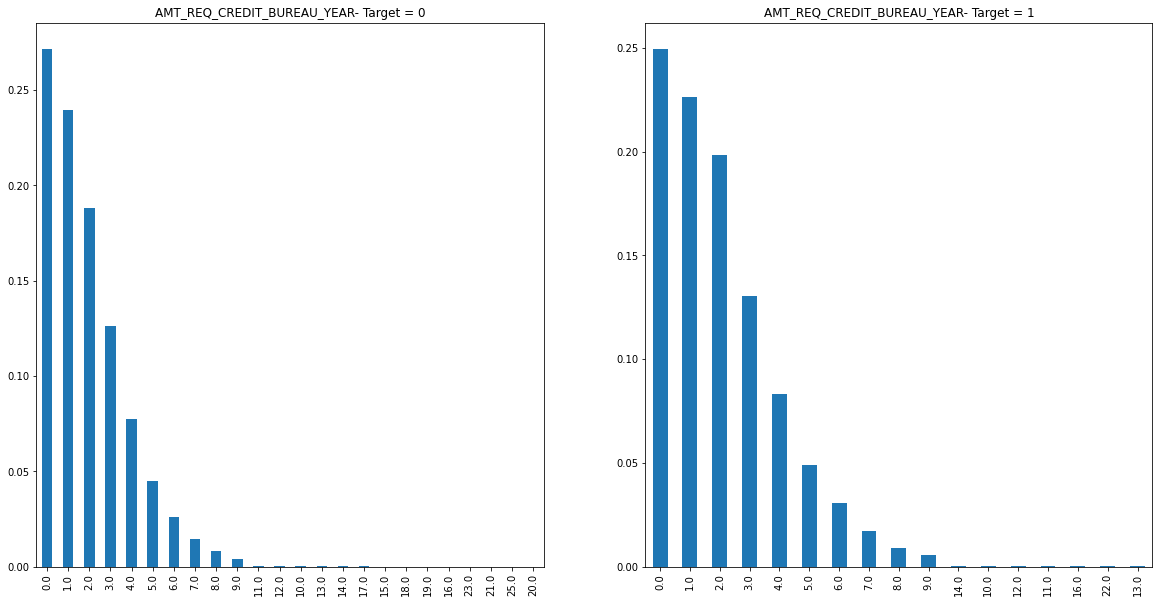

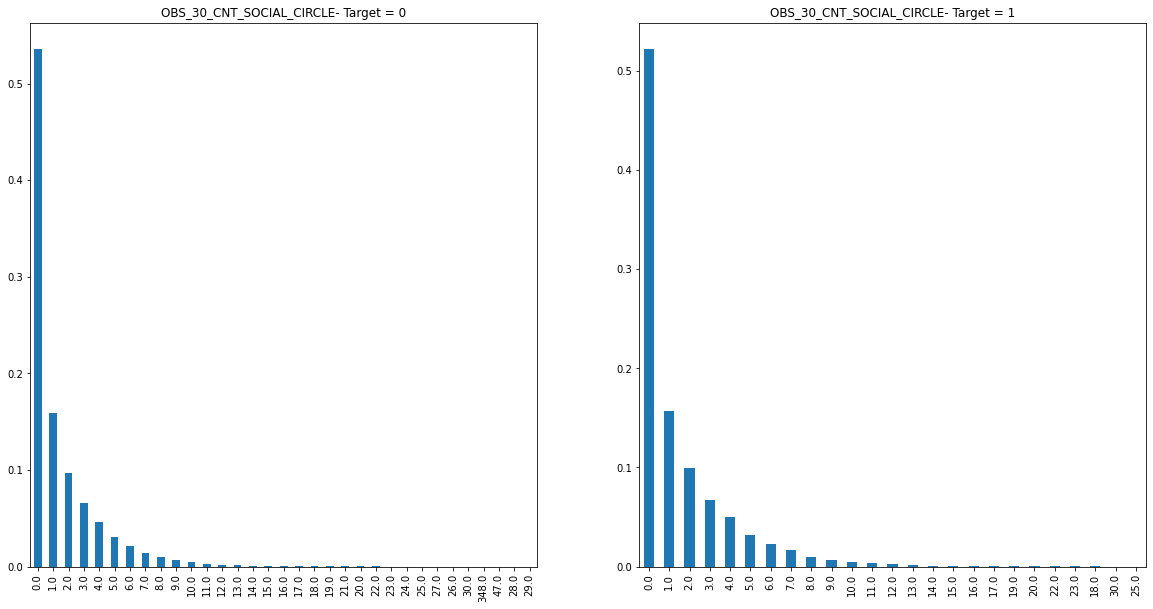

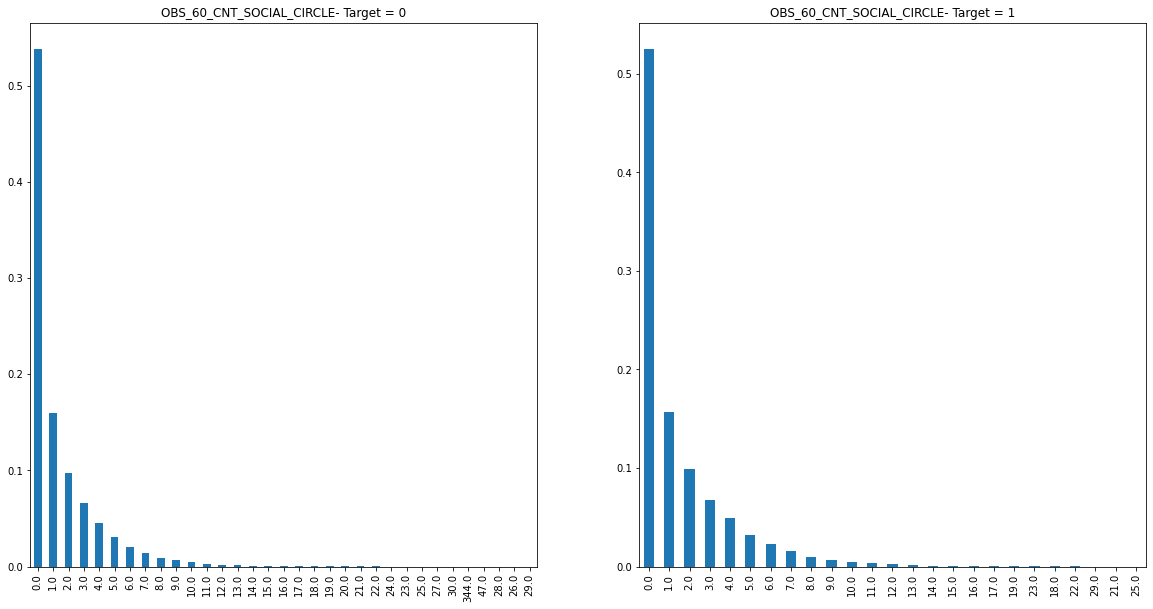

In [ ]:
#loop for performing univariate analysis
for i in categorical_columns:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    target_0_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 0')
    plt.subplot(1,2,2)
    target_1_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 1')
    

#### The above chart shows the distribution of customers across categorical variable for both Target = 0 and Target = 1

#### Key interpretation from univariate analysis of Categorical variables
##### In this section, we will only highlight variables having significant difference for target = 0 and target = 1  

- **Code_Gender**: Defaulters (Target = 1) has a higher percentage of male customers in comparison to non-defaulters (Target = 0)
- **NAME_EDUCATION_TYPE**: Defaulters (Target = 1) has a higher percentage of customers with Secondary/Secondat Special education
- **Age_Group** : Defaulters (Target = 1) has a higher percentage of customers in the age group of 30s
- **NAME_INCOME_TYPE**: Defaulters (Target = 1) has a higher percentage of working customers whereas percentage of defaulting pensioners is lesser in comaprison to non-defaulters(Target = 0)
- **OCCUPATION_TYPE**: Laborers contritbute a higher percentage in defaulters(Target = 1) in comparison to non-defaulters(Target = 0)
- **REGION_RATING_CLIENT_W_CITY**: Customers with rating 3 constitutes a higher percentage of defaulters in comparison to non-defaulters
- **REGION_RATING_CLIENT**: Customers with rating 3 constitutes a higher percentage of defaulters in comparison to non-defaulters


## 4.4 Correlation for numerical columns

#### In this analysis, we are trying to understand how numerical columns are correlated for entrie data set, data for target =0, and data for target =1

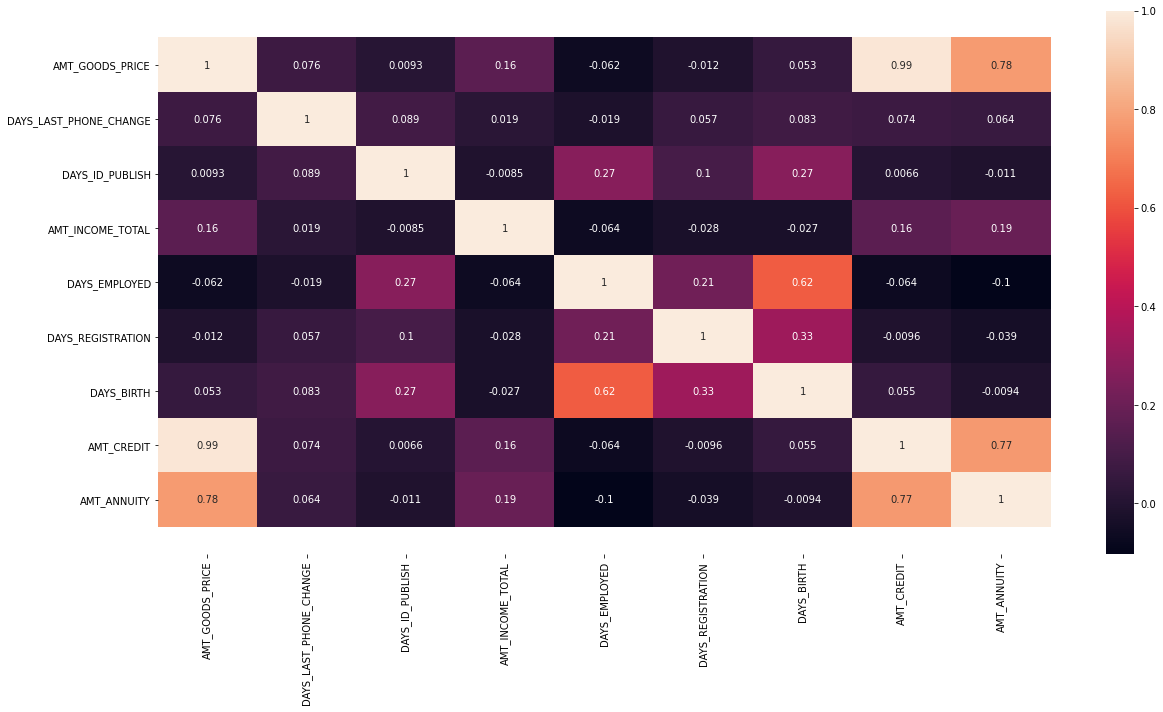

In [ ]:
# correlation analysis for the entire Target data
plt.figure(figsize=(20,10))
sns.heatmap(app_df_2[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

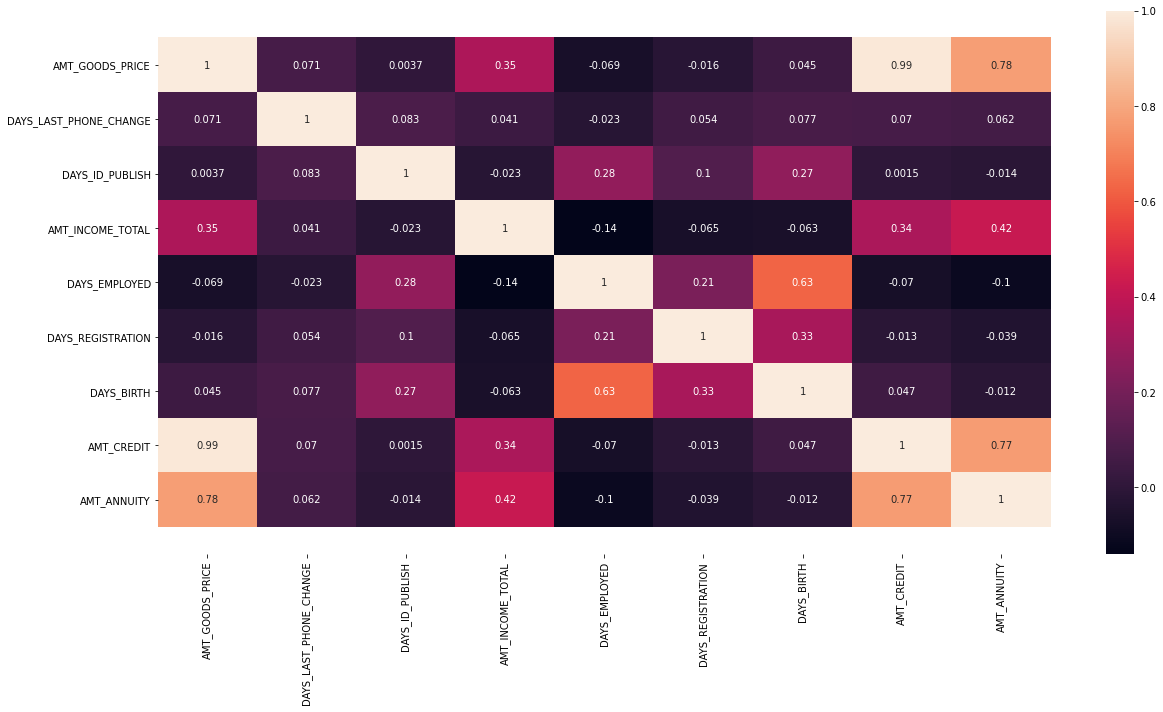

In [ ]:
# correlation analysis for Target = 0
plt.figure(figsize=(20,10))
sns.heatmap(target_0_df[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

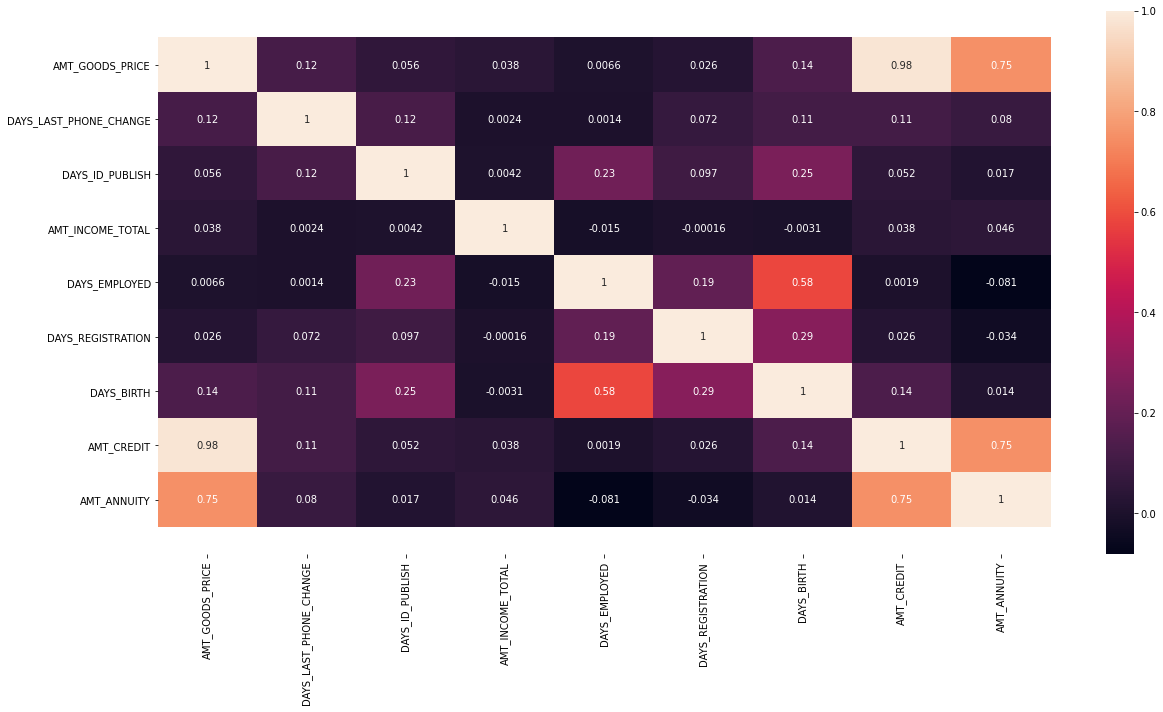

In [ ]:
#correlation analysis for target =1 
plt.figure(figsize=(20,10))
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

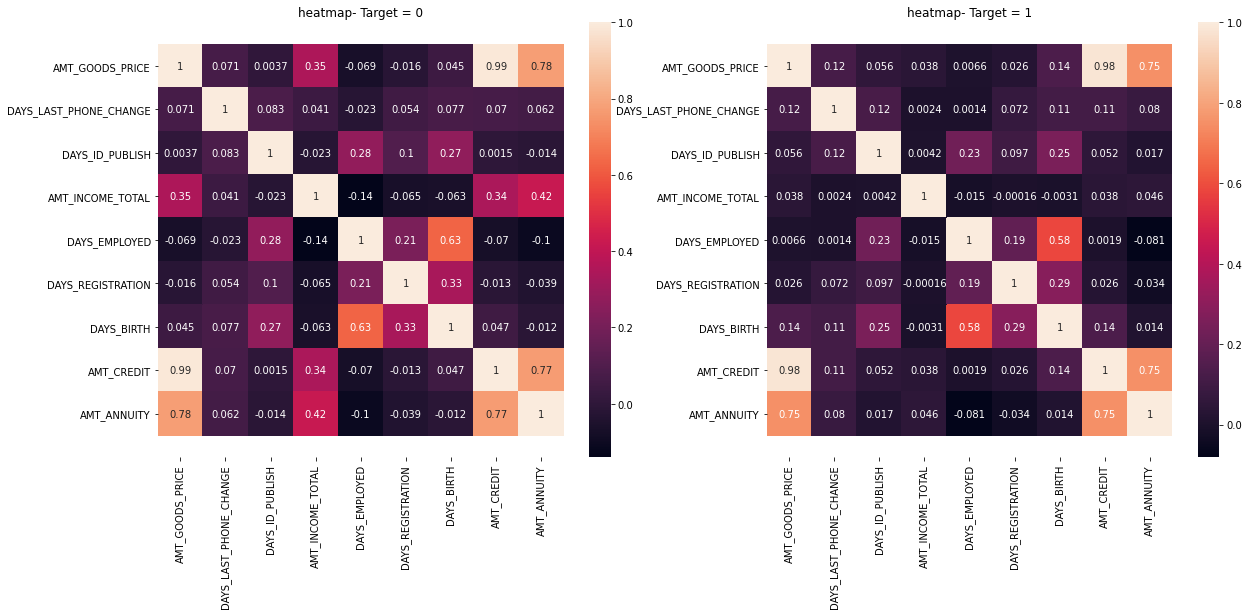

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(target_0_df[numerical_columns].corr(),annot=True)
plt.title('heatmap- Target = 0')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.subplot(1,2,2)
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True,)
plt.title('heatmap- Target = 1')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

#### Through the heatmap we can see same set of columns seem to have a high correlation across all three data sets. Top correlate colums are:
- AMT_GOOD_PRICE vs AMT_CREDIT
- AMT_GOOD_PRICE vs AMT_ANNUITY
- AMT_CREDIT_AMT_ANNUITY

### 4.5 Checking if Variables with highest coeffecient are same in both file

#### This analysis is conducted to understand if top 10 high correlation variables are common across for both data - target =0 and target =1

In [ ]:
# Correlation for numberical columns for Target = 0
corr = target_0_df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

In [ ]:
# Correlation for numberical columns for Target = 1
corr = target_1_df.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

#### 8 out of top 10 pair of high correlated variables are same for both 0 and 1

https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

### 4.6 Univariate Analysis for Numerical Values

#### The objective of this analysis is to understand how numerical variables vary between target 0 and 1 

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.boxplot(target_0_df[i])
    plt.title(i+ '- Target = 0')
    plt.subplot(1,2,2)
    sns.boxplot(target_1_df[i])
    plt.title(i+ '- Target = 1')

#### Key interpretation from univariate analysis of numerical variables
##### In this section, we will only highlight variables having significant difference for target = 0 and target = 1  

- **DAYS_LAST_PHONE_CHANGE**: Median value and 75 percentile value for Defaulters (Target = 1) is lesser than non-defaulters. It implies defaulter more often change phone number before application
- **DAYS_ID_PUBLISH**: Defaulters seem to change IDs more frequetly than non-defaulters
- **DAYS_BIRTH**: 25 percentile, median, and 75 percentile for the age of defaulter applicants are smaller than younger applicants. This means defaulter population is younger than non-defaulter. 

### 4.7 Bivariate Analysis for Categorical Variable

#### For bi variate analysis wrt target-0&1, we will use the data set where full target column is available. Further, we will calculate mean of target column for each categorical variable as it will tell us percentage of defaulters for the category 

In [ ]:
app_df_2['TARGET'][1:500:5]

In [ ]:
app_df_2[1:500:5]

In [ ]:
app_df_2['TARGET'].mean()

In [ ]:
for i in categorical_columns:
    (app_df_2.groupby(i)['TARGET'].mean()).plot.bar() 
    plt.title(i+ 'vs' +'Target')
    plt.show()

#### Key interpretation from bivariate analysis of categorical variables
##### In this section, we will only highlight key outcomes from Bivariate analysis
- **CODE_GENDER**: Male customers have a higher probability of defaulting
- **NAME_EDUCATION_TYPE**:Customers with lower secondary education have a higher risk of default
- **AGE_GROUP**- Customers in 20s and 30s have higher chances of deafaulting
- **NAME_HOUSING_TYPE**: Customers living in rented apartments and living with parents seem to default more
- **NAME_INCOME_TYPE**:Unemployed and Customers on maternity leave have higher 
- **OCCUPATION_TYPE**:Low-skill laborers default more
- **REGION_RATING_CLIENT**&**REGION_RATING_CLIENT_W_CITY**: Customers with rating 3 have higher risk of defaulting    

### Perfoming multivariate Analysis

In [ ]:
#multivariate_analysis-1
pivot_data = pd.pivot_table(app_df_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='NAME_INCOME_TYPE')
sns.heatmap(pivot_data, annot=True,cmap="BuPu")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

In [ ]:
#multi-variate analysis -2
pivot_data = pd.pivot_table(app_df_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='AMT_CATEGORY')
sns.heatmap(pivot_data, annot=True,cmap="BuPu")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

In [ ]:
#multi-variate analysis-3
pivot_data = pd.pivot_table(app_df_2, values ='TARGET',index=['CODE_GENDER','NAME_EDUCATION_TYPE'], columns='NAME_FAMILY_STATUS')
sns.heatmap(pivot_data, annot=True,cmap="BuPu")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

## 4.7 Bivariate Analsyis for Numerical columns

#### The objective of this analysis is to find pattern in defaulter vs non-defaulter customers wrt target

In [ ]:
# loop for bivariate analysis for numerical variables
for i in numerical_columns:
    sns.boxplot(data = app_df_2, x='TARGET',y= i)
    plt.show()

#### Key interpretation from bivariate analysis of categorical variables
##### In this section, we will only highlight key outcomes from Bivariate analysis
- **DAYS_LAST_PHONE_CHANGE**:Defaulter customers change phone closer to the submission of application
- **DAYSID_PUBLISH**:Defaulter customers changes id closer to submission of application
- **DAYS_REGISTRATION**: Defaulter customers changes registration on a date closer to submission of application
- **DAYS_BIRTH**: Defaulter customers are relatively younger than non-defaulters

# Reading the Previous Application

In [ ]:
#Reading the data in pandas
prev_app_location = "/content/loan-defaulter/previous_application.csv"
prev_app = pd.read_csv(prev_app_location)
prev_app.head()

# Analyzing Previous Application Data 

In [ ]:
prev_app.shape

In [ ]:
prev_app.info()

In [ ]:
prev_app.describe()

## Data Quality Check And Missing Values

In [ ]:
# checking column-wise null percentages
prev_cols = pd.DataFrame(prev_app.isnull().mean().round(4) * 100, columns =['prev_app_precentage_missing_value']).sort_values(by=['prev_app_precentage_missing_value'])
print(prev_cols)

In [ ]:
# checking row-wise null percentages
prev_rows= pd.DataFrame(prev_app.isnull().sum(axis=1), columns=['prev_app_num_missing_value'])
prev_rows

## Dropping the columns with high percentage of missing values(>50%)

In [ ]:
#Droping column having more than 50 % null values 
prev_app_1 = prev_app.drop(prev_app.columns[prev_app.apply(lambda col: col.isnull().sum()/len(prev_app)*100 > 50)], axis=1)
prev_app_1

# 5.1 Merging Present and Previous Application data 

### Verifying if SK_ID_CURR column can be used as a primary key to merge two Dataframes or not

In [ ]:
# Analysis for SK_ID_CURR to be a primary key
# Previous Application analysis

print ("Total count:", prev_app_1['SK_ID_CURR'].count())
print ("Number of unique values:", prev_app_1['SK_ID_CURR'].nunique())

if (prev_app_1['SK_ID_CURR'].count() == prev_app_1['SK_ID_CURR'].nunique()):
    print ("SK_ID_CURR has all unique values")
else:
    print ("SK_ID_CURR doesn't have all unique values")

In [ ]:
# Analysis for SK_ID_CURR to be a primary key 
# Present Application analysis

print ("Total count:", app_df_2['SK_ID_CURR'].count())
print ("Number of unique values:", app_df_2['SK_ID_CURR'].nunique())

if (app_df_2['SK_ID_CURR'].count() == app_df_2['SK_ID_CURR'].nunique()):
    print ("SK_ID_CURR has all unique values")
else:
    print ("SK_ID_CURR doesn't have all unique values")


### Merging the Application data with witht Previous Application Data on SK_ID_CURR column

In [ ]:
combined_df = pd.merge(left =app_df_2, right =prev_app_1, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner', validate=None)
combined_df

### Getting the different Types of contract statuses:

In [ ]:
combined_df.NAME_CONTRACT_STATUS.unique()

## Preparing data for Approved Contract Status

## 5.2.1. Doing analysis on People with Contract Status as Approved

In [ ]:
# Extracting only the approved loan applications from the combined data
combined_approved_df = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Approved']
combined_approved_df

### Univariate Analysis for few categorical columns in combined dataframe

In [ ]:
combined_categorical_columns = ['NAME_CONTRACT_TYPE_x',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP']

In [ ]:
for i in combined_categorical_columns:
    plt.figure(figsize=(10,5))
    combined_approved_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Approved Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

In [ ]:
combined_numerical_columns= ['AMT_GOODS_PRICE_x',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED',
                    'DAYS_REGISTRATION',
                    'DAYS_BIRTH',
                    'AMT_CREDIT_x',
                    'AMT_ANNUITY_x'
                   ]

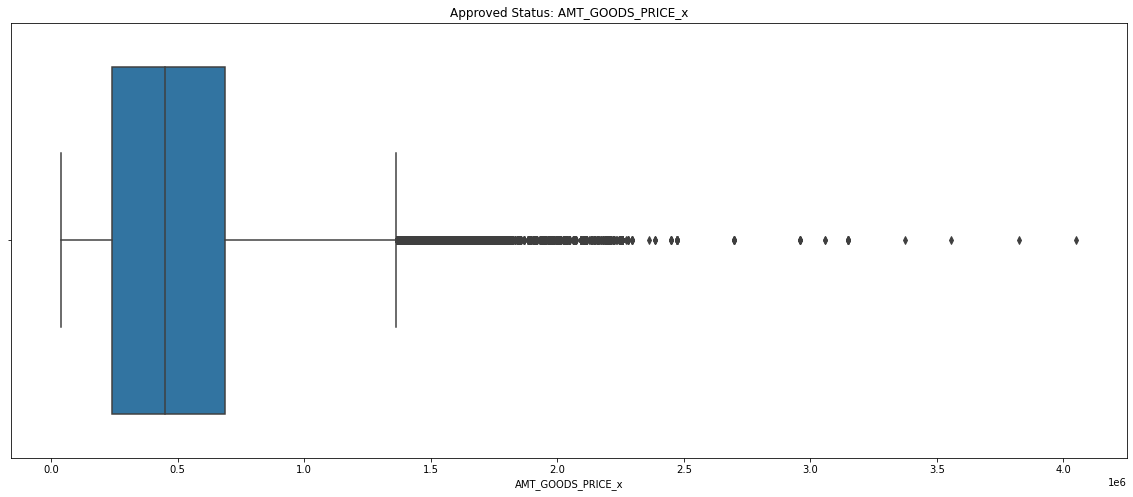

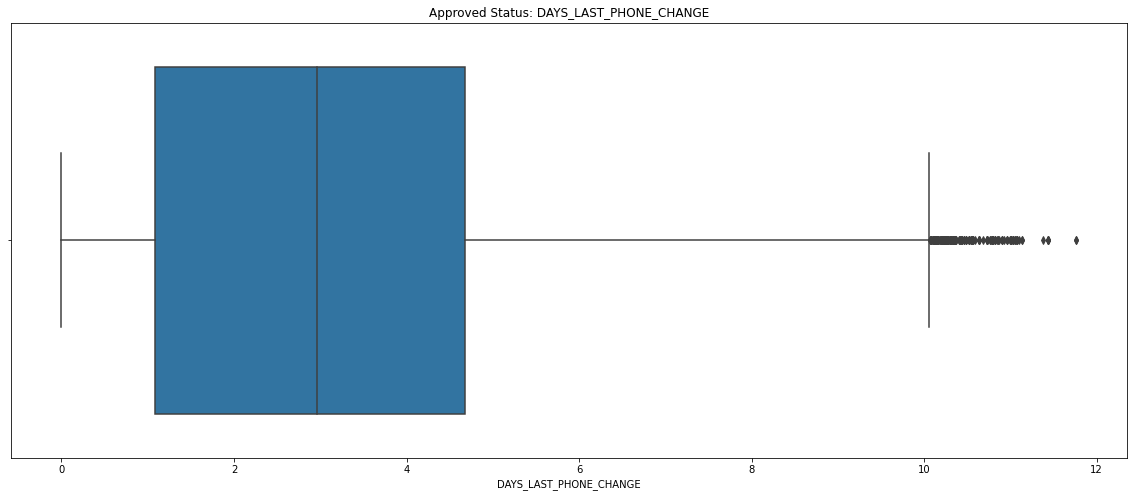

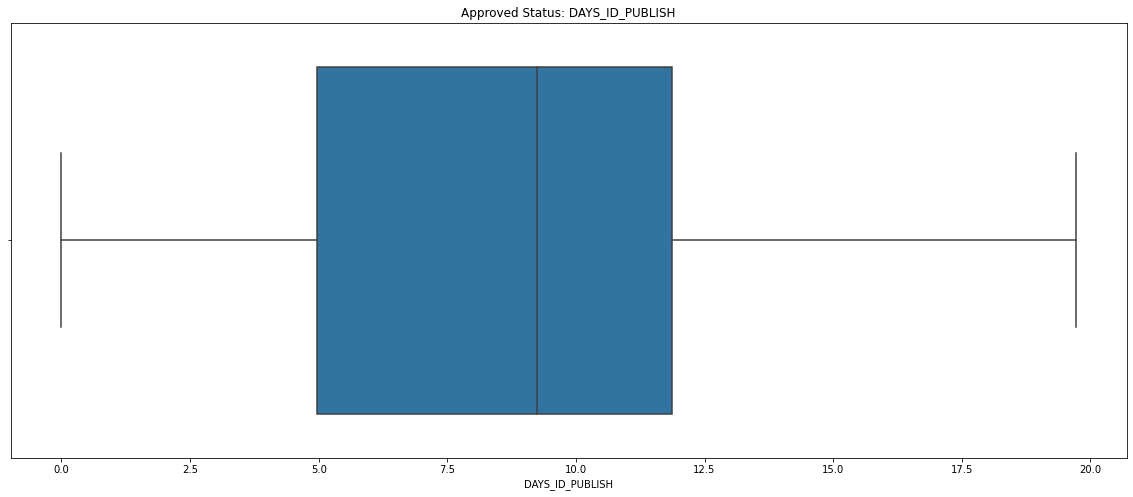

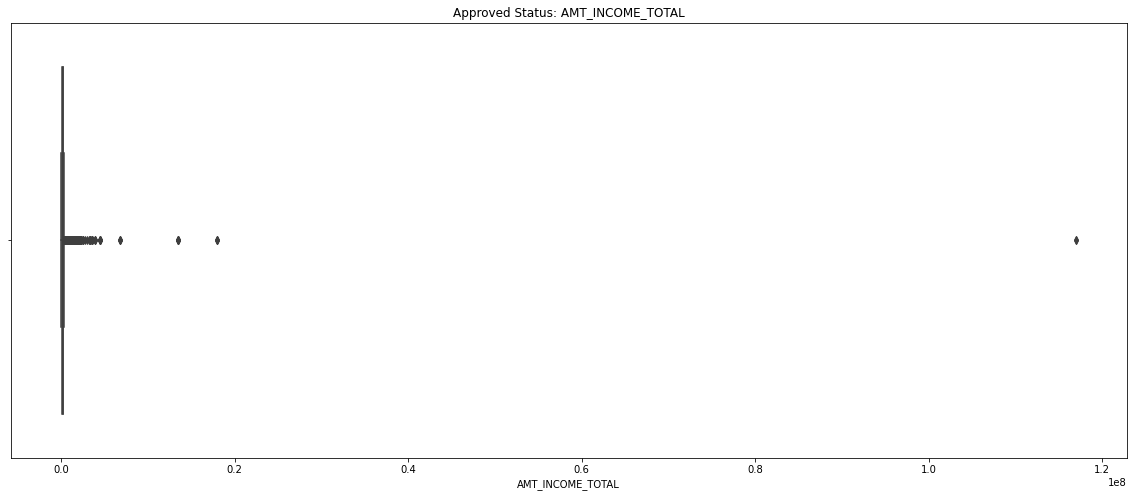

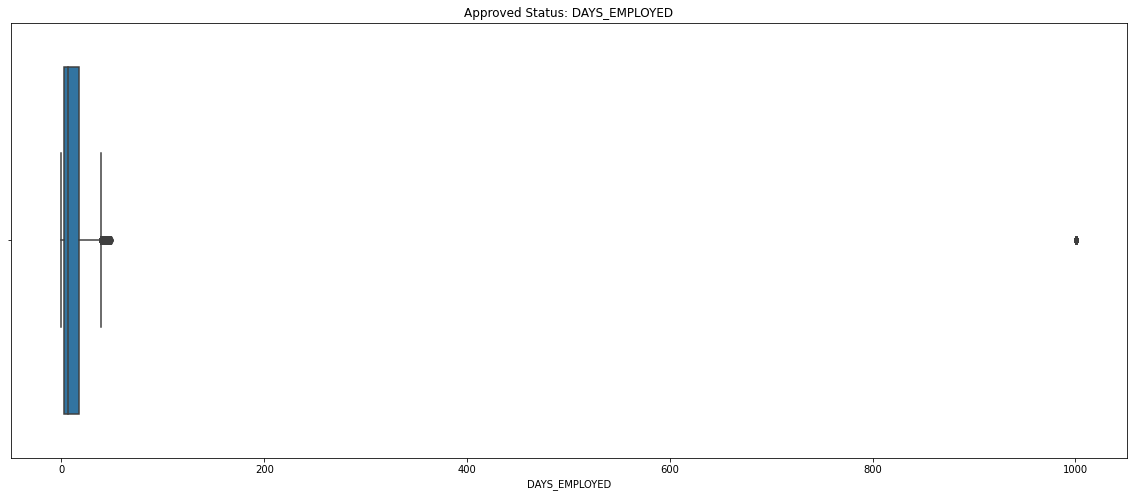

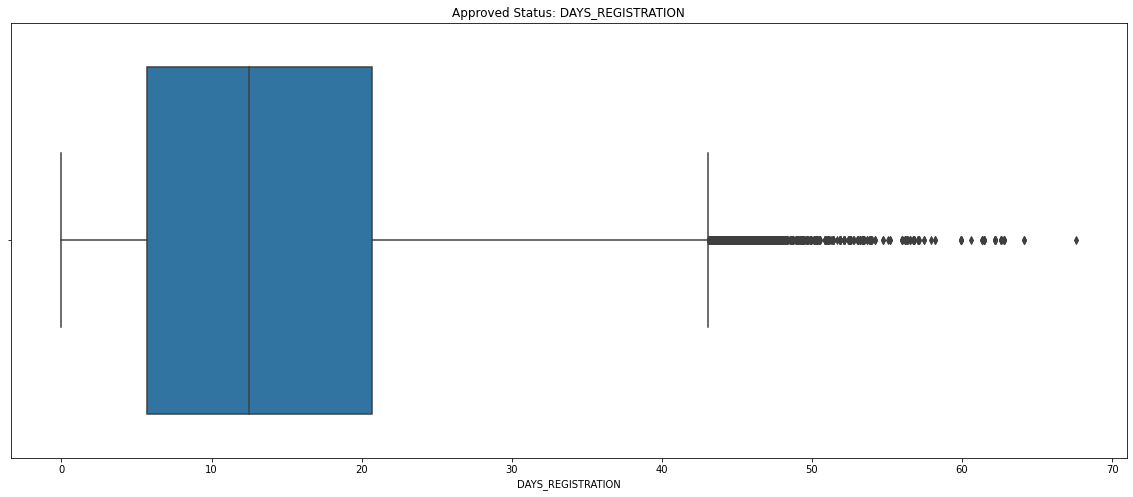

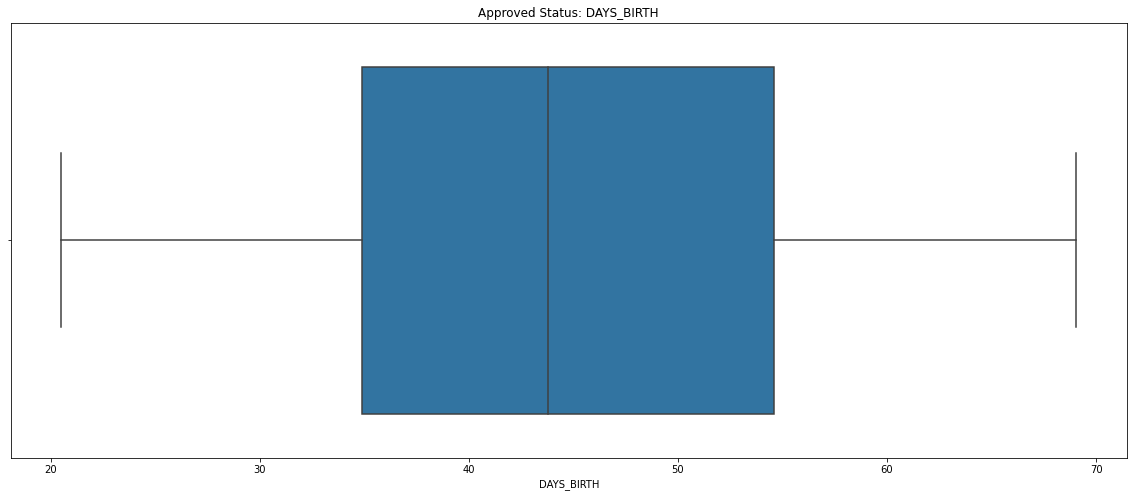

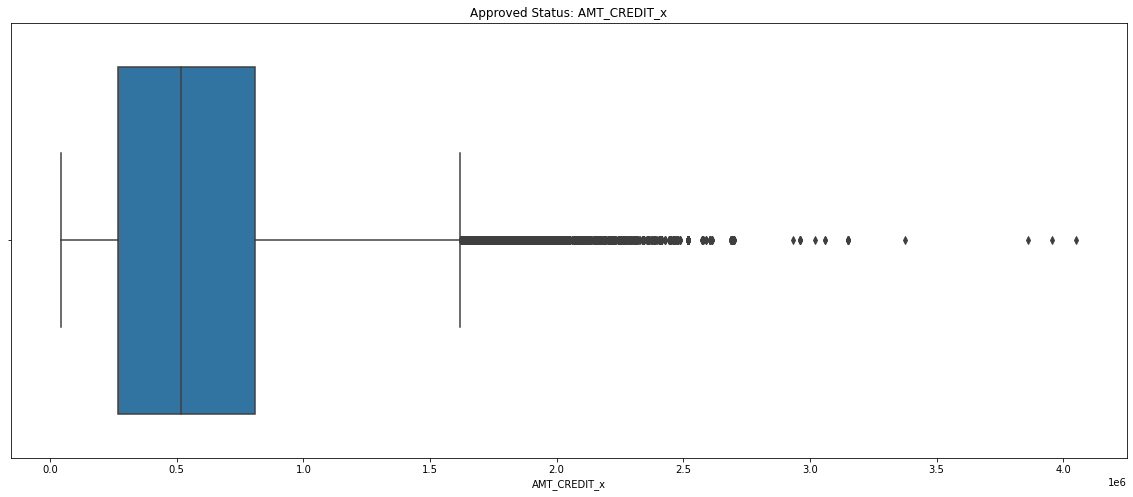

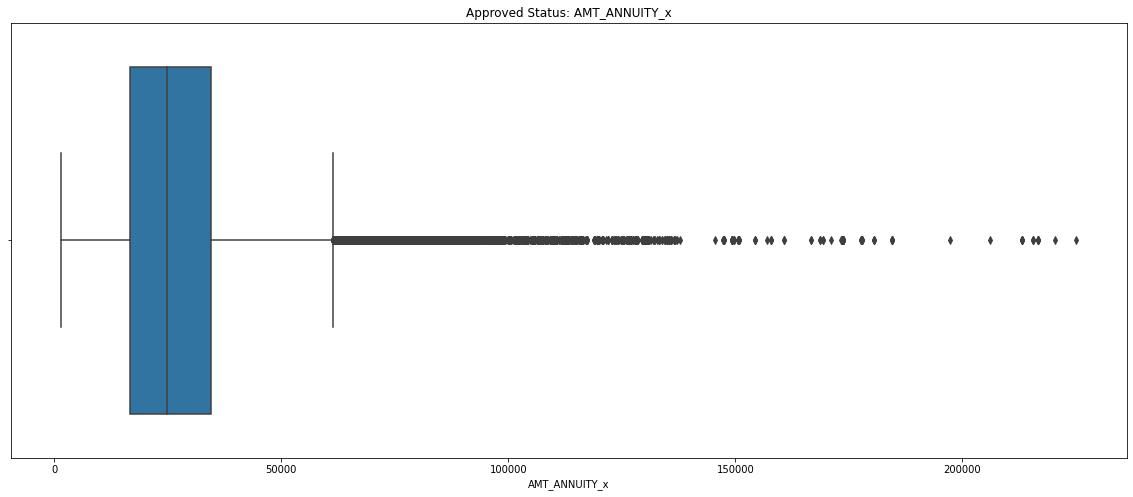

In [ ]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_approved_df[i])
    plt.title("Approved Status: "+i)

## Bivariate Analysis for few Categorical Variable of combined dataframe

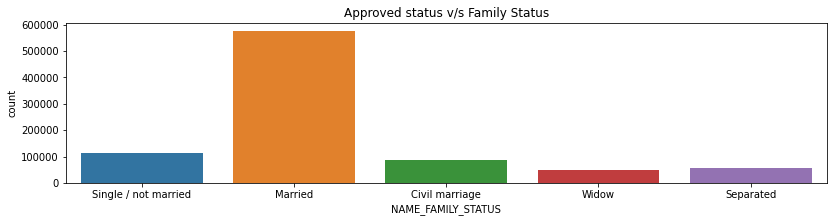

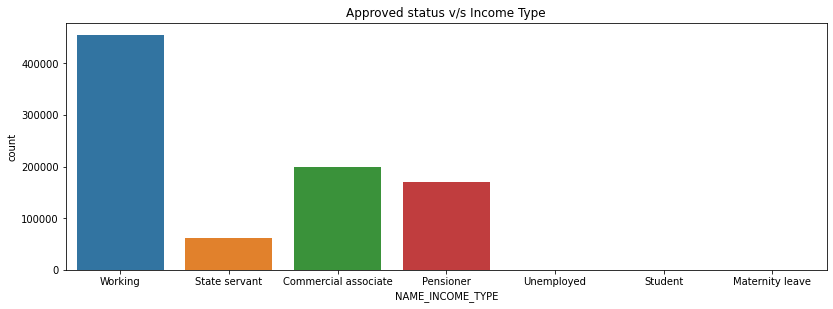

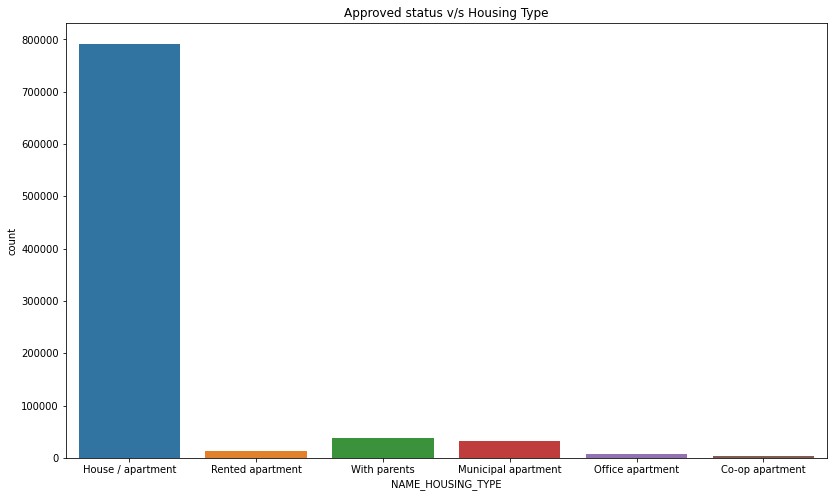

In [ ]:
# People with approved status- First Variable

# 1. Second Variable : Family Status
plt.figure(figsize=(30,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = combined_approved_df)
plt.title("Approved status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = combined_approved_df)
plt.title("Approved status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = combined_approved_df)
plt.title("Approved status v/s Housing Type")
plt.show()


## Inference from the above Bivariant analysis for categorical data is as below:

#### 1. Approved status v/s Family Status: People who are married are more likely to get loan approved

#### 2. Approved status v/s Income Type: People who are working are more likely to get loan approved compared to students who are least likely to get loan approved

#### 3. Approved status v/s Housing_type: People who own House/apartment are more likely to get loan approved then compared to rented appartments/ co-op apartment types

# Bivariant analysis for Numerical Data.

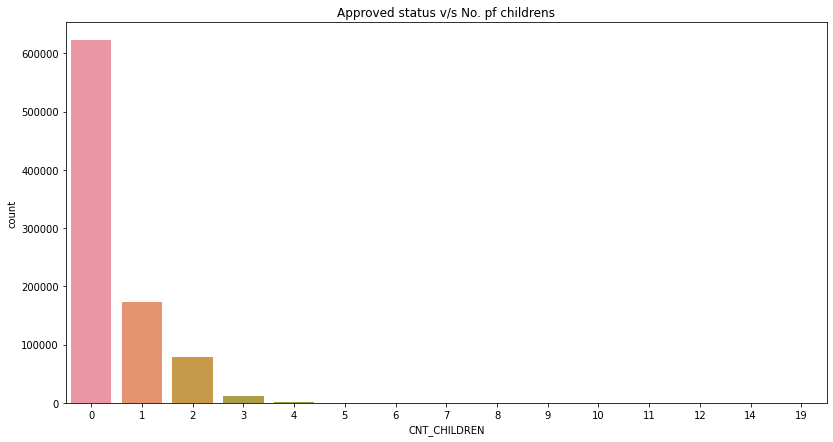

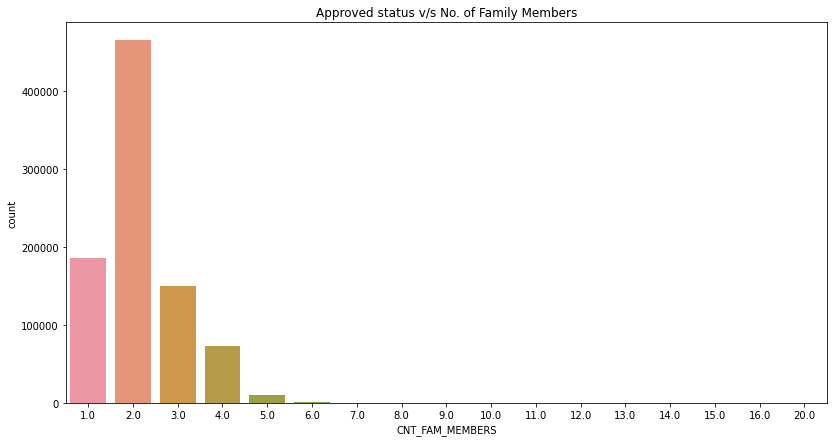

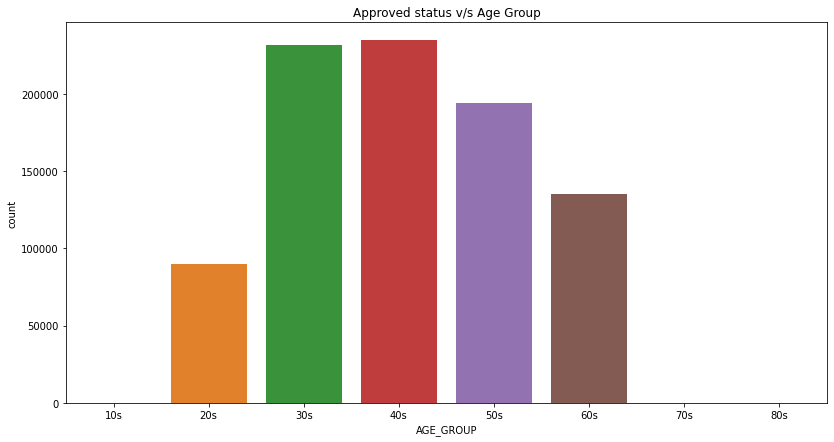

In [ ]:
# People with approved status and who are non-defaulters - First Variable

# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = combined_approved_df)
plt.title("Approved status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = combined_approved_df)
plt.title("Approved status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = combined_approved_df)
plt.title("Approved status v/s Age Group")
plt.show()


## Inference from the above Bivariant analysis for numerical data is as below:

#### 1. Approved status v/s No. of children: People with 0 children are more likely to get loan approved

#### 2. Approved status v/s No. of family members: If the number of people in a family is 2 they are more likely to get loan approved.

#### 3. Approved status v/s Age: People with age in between 30 -50 years are more likely to get loan approved compared to the people in 20s and 60s

## 5.2.2 Doing analysis on People with Contract Status as Reused

### Preparing data for people with refused status

In [ ]:
# People with Refused status in combined dataframe
combined_refused_df = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Refused']
combined_refused_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
13,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,26.94,6.68,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1.69,NaN,NaN,NaN,NaN,NaN,NaN,50s,Average,1697039,Cash loans,32696.100,688500.0,906615.0,688500.0,THURSDAY,15,Y,1,XNA,Refused,-181,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
33,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,55.07,1000.67,20.35,9.63,NaN,2.0,2,2,XNA,1.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,50s,Average,2668005,Cash loans,NaN,0.0,0.0,0.0,WEDNESDAY,9,Y,1,XNA,Refused,-1162,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
79,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,68.02,1000.67,24.69,10.09,NaN,2.0,3,3,XNA,0.0,0.0,0.0,0.0,2.18,0.0,0.0,0.0,0.0,0.0,3.0,60s,Low,2531618,Cash loans,22556.475,225000.0,239850.0,225000.0,SATURDAY,14,Y,1,XNA,Refused,-181,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
84,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,52.97,9.57,6.63,7.93,Cleaning staff,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low,2691769,Consumer loans,3140.460,33660.0,33660.0,33660.0,SATURDAY,7,Y,1,XAP,Refused,-2688,XNA,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,30,Furniture,12.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
85,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,52.97,9.57,6.63,7.93,Cleaning staff,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low,2579186,Consumer loans,3140.460,33660.0,33660.0,33660.0,FRIDAY,15,Y,1,XAP,Refused,-2689,XNA,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,30,Furniture,12.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413670,456244,0,Cash l

### Univariate Analysis for few categorical columns in combined dataframe

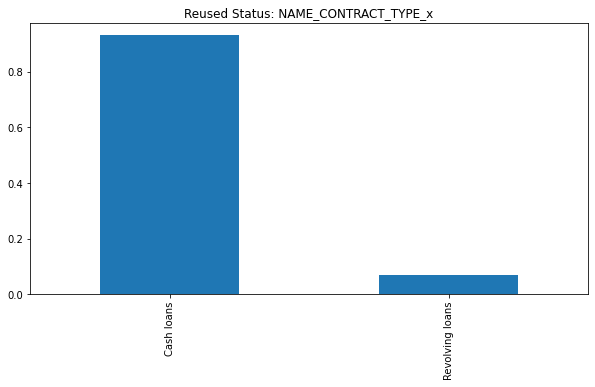

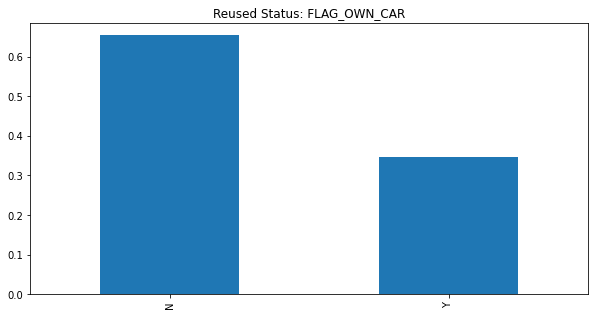

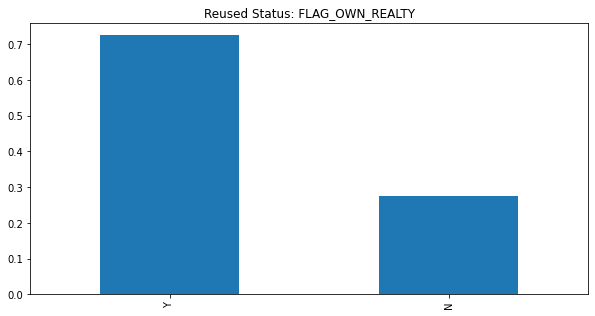

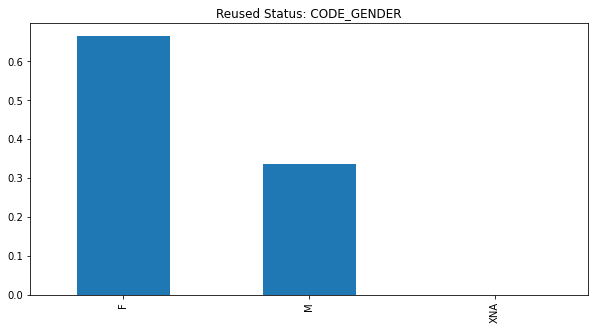

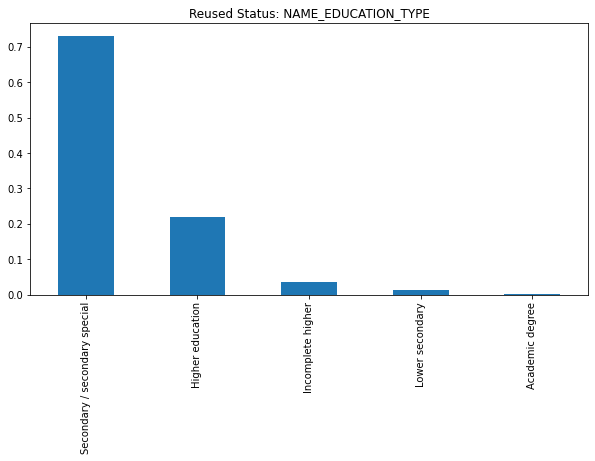

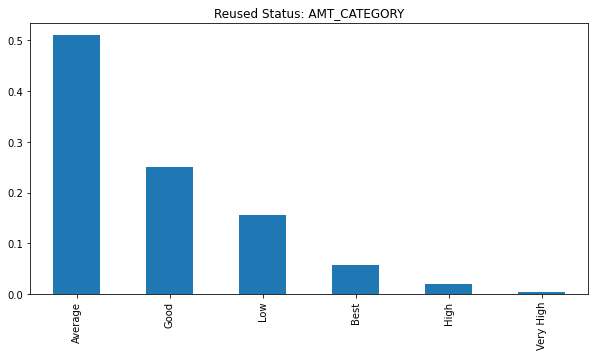

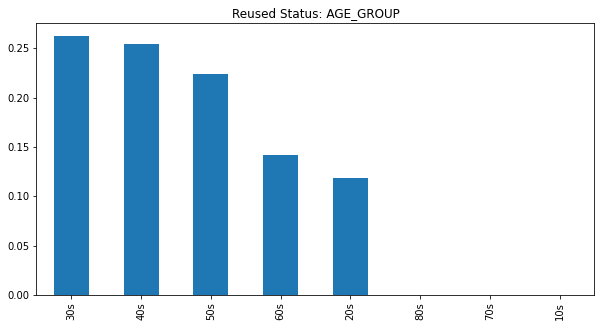

In [ ]:
for i in combined_categorical_columns:
    plt.figure(figsize=(10,5))
    combined_refused_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Reused Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

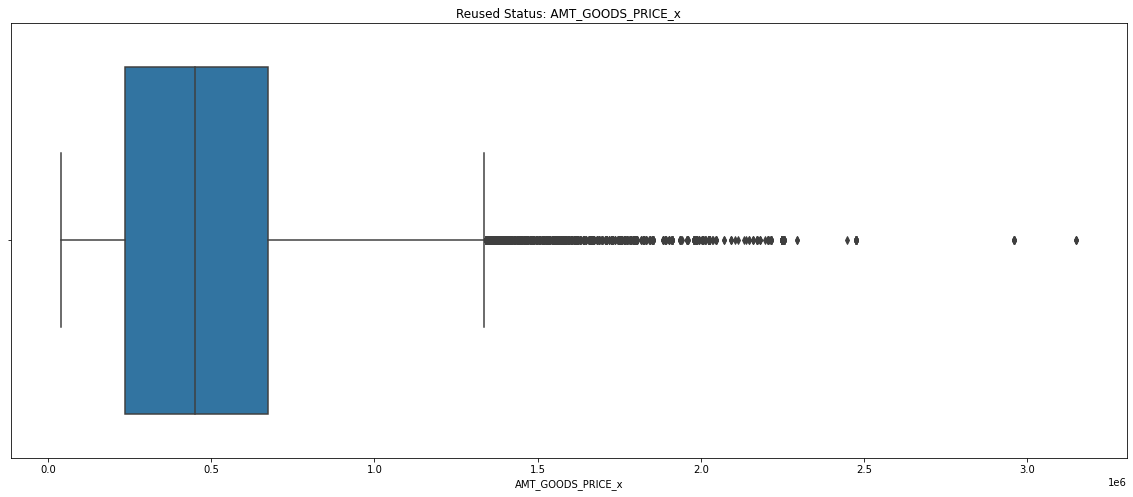

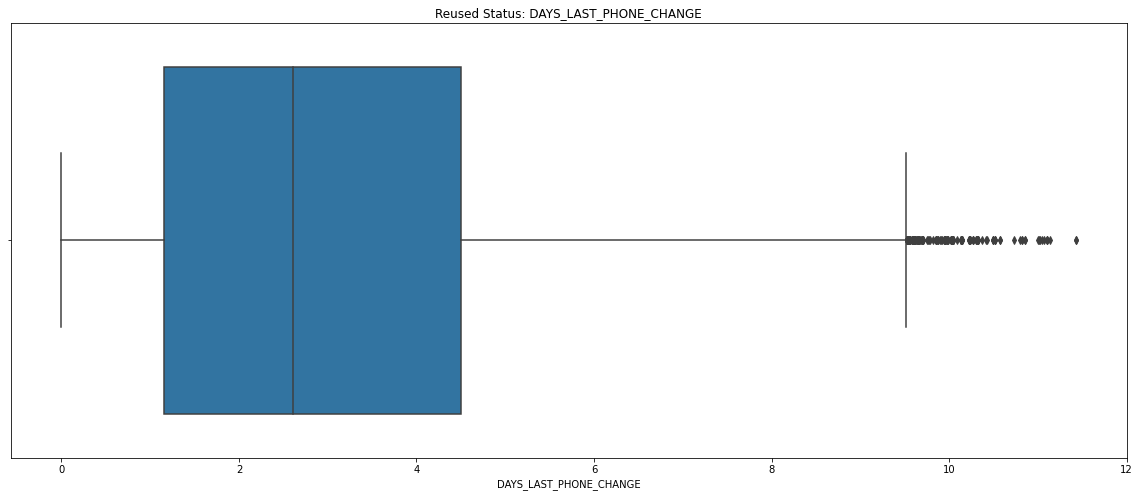

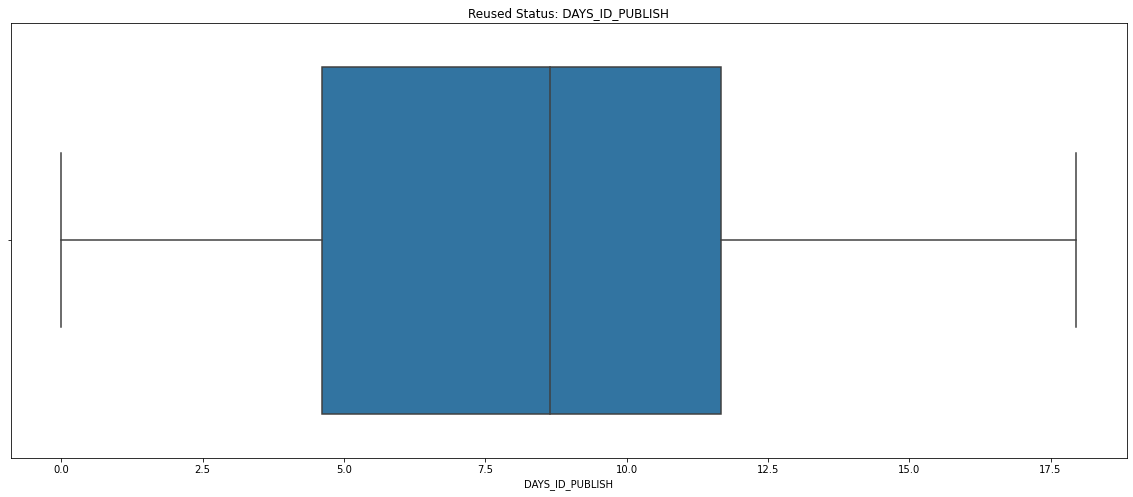

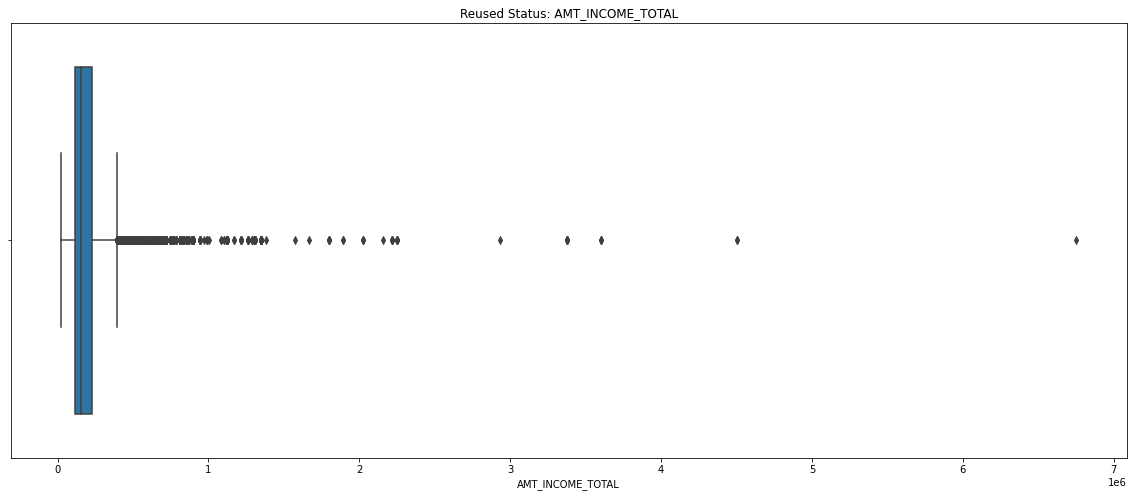

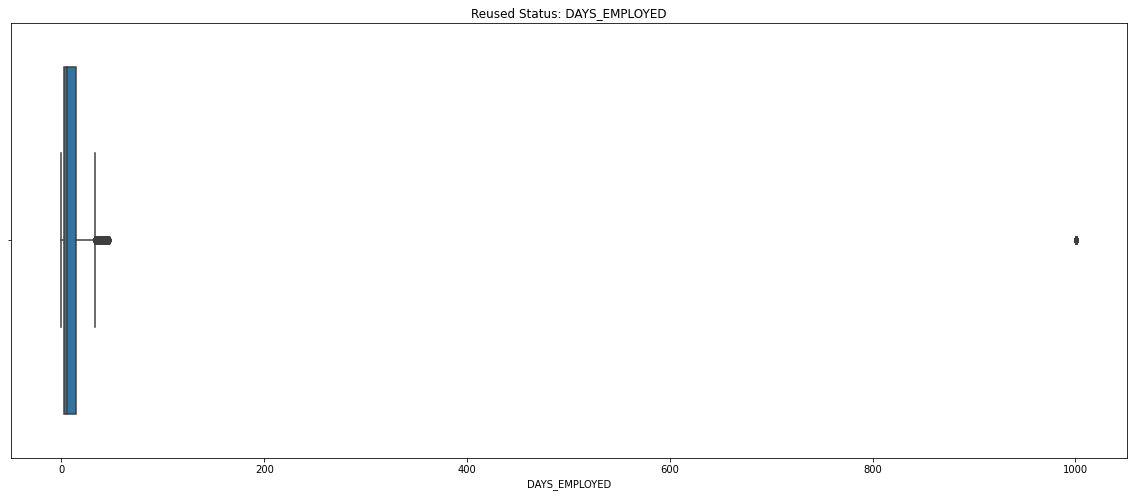

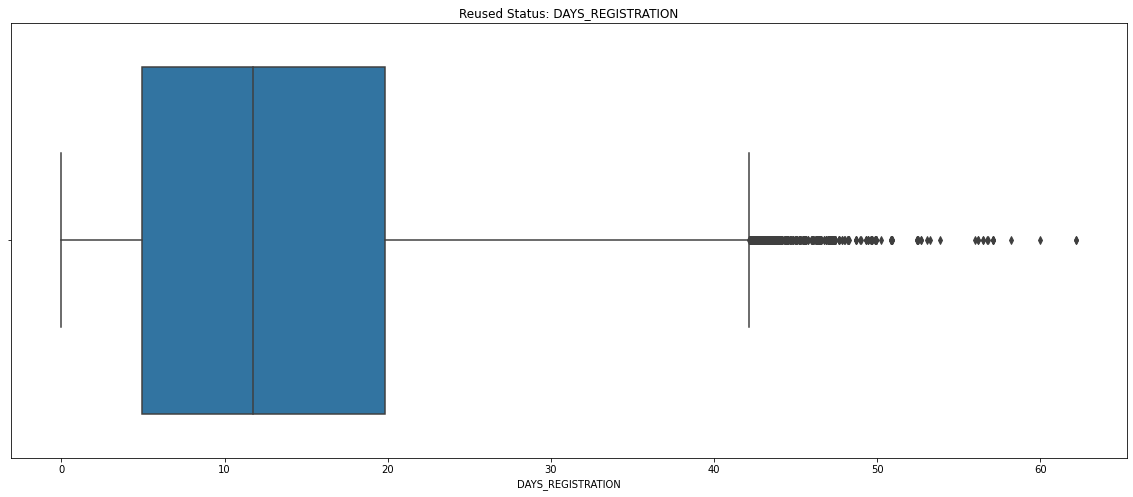

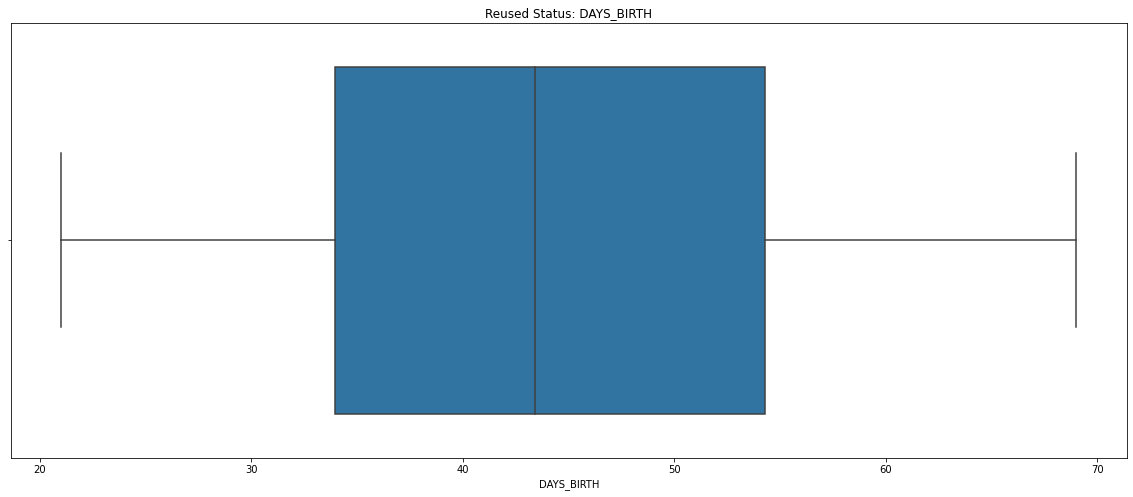

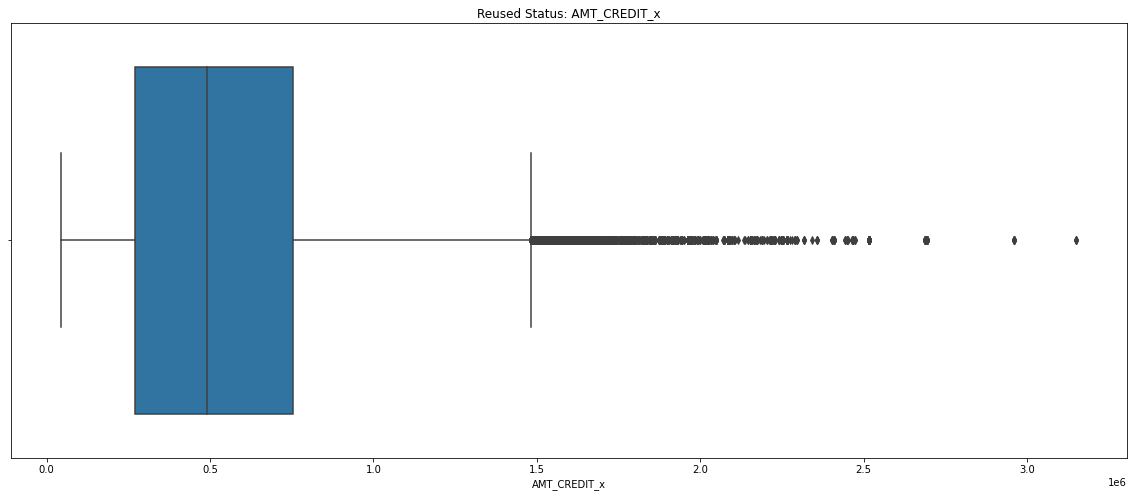

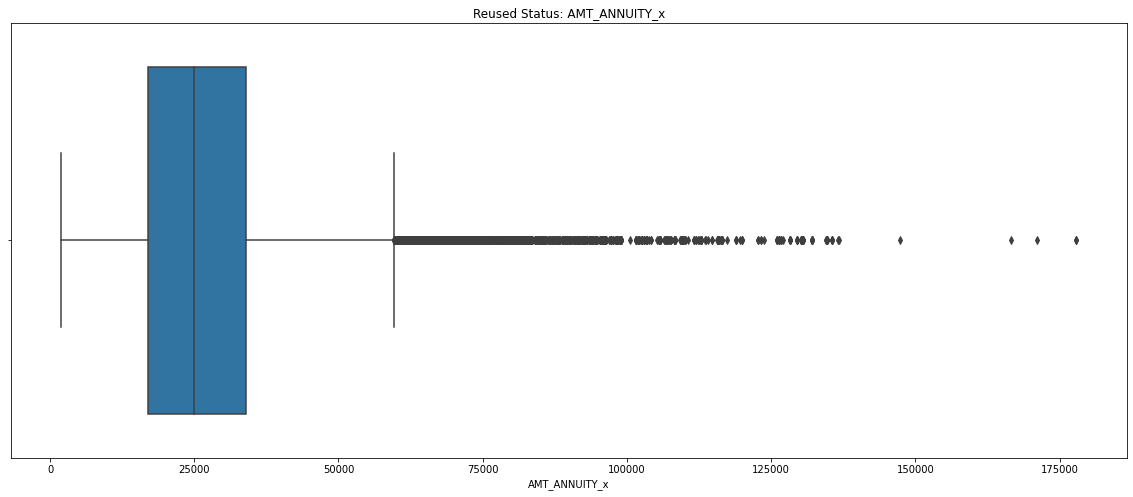

In [ ]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_refused_df[i])
    plt.title("Reused Status: "+i)

# Bivariant analysis for Categorical Data for the reused applications

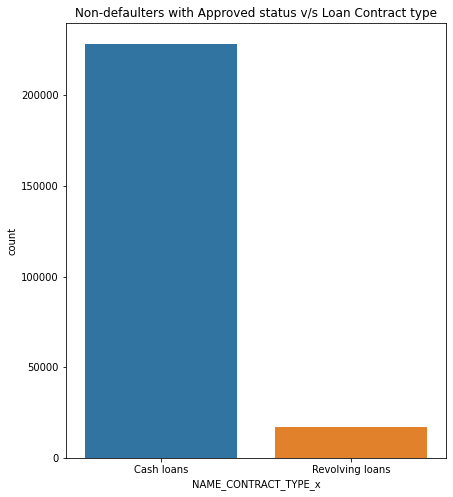

In [ ]:
# People with approved status now on reapplying when their earlier applications were refused - First Variable

# 1. Second Variable : Contract Type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_refused_df)
plt.title("Non-defaulters with Approved status v/s Loan Contract type")
plt.show()

## Inference from the above Bivariate analysis for categorical data is as below:

#### 1. Cash loans: Are more likely to be re-applied

# Bivariant analysis for Numerical Data for the reapplied applications

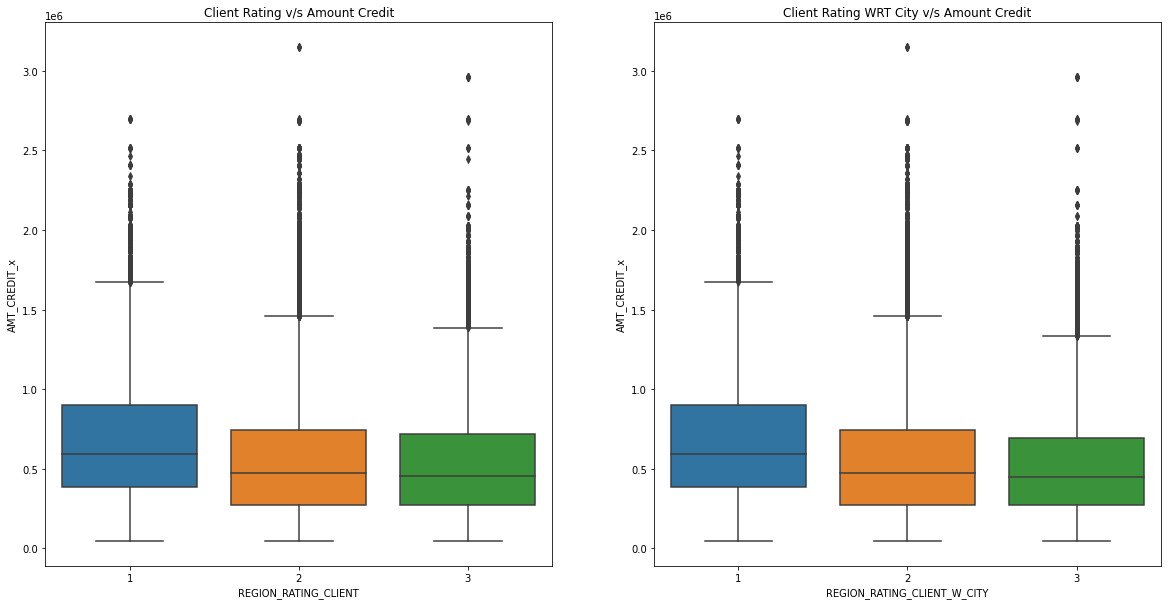

In [ ]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_refused_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_refused_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


In [ ]:
# Analysis: Below are the applications which needs careful analysis as the amount credit for those people 
        # is more than their annual income 

combined_refused_df['diff'] = (combined_refused_df['AMT_INCOME_TOTAL'] < combined_refused_df['AMT_CREDIT_x'])
print ("Number of people with reused status are having credit amount more than annual income: ", len(combined_refused_df))

Number of people with reused status are having credit amount more than annual income:  245390


In [ ]:
#Amount requested is more compared to the Annual income, that it is refused

plt.figure(figsize=(20,10))
sns.boxplot(x='AMT_INCOME_TOTAL', y='diff', data = combined_refused_df)
plt.title("Type of loan refused based on the income")
plt.show()

## 5.2.3. Doing analysis on People with Contract Status as Canceled

### Preparing dataframe for people with Cancelled status from the combined dataframe

In [ ]:
combined_cancelled_df=combined_df[combined_df.NAME_CONTRACT_STATUS == 'Canceled']
combined_cancelled_df

### Univariate Analysis for few numerical columns in combined dataframe

In [ ]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_refused_df[i])
    plt.title("Cancelled Status: "+i)

# Bivariant analysis for Categorical Data for the reused applications

In [ ]:
# People with approved status now on reapplying when their earlier applications were cancelled - First Variable

# 1. Second Variable : Contract Type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_cancelled_df)
plt.title("Cancelled v/s Loan Contract type")
plt.show()

## Inference from the above Bivariate analysis for categorical data is as below:

#### 1. Cash loans: Are more likely to be cancelled

# Bivariant analysis for Numerical Data for the Cancelled applications

In [ ]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_cancelled_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_cancelled_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


## 5.2.4 Doing analysis on People with Contract Status as Un-used offer

### Preparing data for people with Unused offer status

In [ ]:
# People with Refused status in combined dataframe
combined_unused_df = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Unused offer']
combined_unused_df

### Univariate Analysis for few categorical columns in combined dataframe

In [ ]:
for i in combined_categorical_columns:
    plt.figure(figsize=(10,5))
    combined_unused_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Un used offer Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

In [ ]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_unused_df[i])
    plt.title("Unused Status: "+i)

# Bivariant analysis for Categorical Data for the unused applications

In [ ]:
# People with unused offer status - First Variable

# 1. Second Variable : Contract Type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_unused_df)
plt.title("Unused status v/s Loan Contract type")
plt.show()

## Inference from the above Bivariate analysis for categorical data is as below:

#### 1. Cash loans: Are more likely to be re-applied

# Bivariant analysis for Numerical Data for the reapplied applications

In [ ]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_unused_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_unused_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


In [ ]:
for i in combined_categorical_columns:
    (combined_df.groupby(i)['TARGET', 'NAME_CONTRACT_STATUS'].mean()).plot.bar()
    plt.title(i+ 'vs' +'Target')
    plt.show()

In [ ]:
combined_unused_df.head()

## 5.3 Analysis to understand the relation between NAME_CONTRACT_STATUS AND TARGET

In [ ]:
combined_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean()

#### There is not much difference in the default rate for  previous application staus 